1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

EDA Assignment Questions

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df= pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


1: What is the range of selling prices in the dataset?

In [ ]:
price_range=df['selling_price'].max()-df['selling_price'].min()
print(f"The range of selling price of bike in data set:{price_range}")

The range of selling price of bike in data set:755000


2:What is the median selling price for bikes in the dataset?

In [ ]:
df['selling_price'].isna().sum()

np.int64(0)

In [ ]:
median=df['selling_price'].median()
print(f'the median selling price for bikes in the dataset:{median}')

the median selling price for bikes in the dataset:45000.0


3:What is the most common seller type?


In [ ]:
def common_seller(sellertype):
    # Initialize counts
    Individual = 0
    Dealer = 0

    for seller in sellertype:
        if seller == 'Individual':
            Individual += 1
        elif seller == 'Dealer':
            Dealer += 1

    if Individual > Dealer:
        return 'Individual'
    elif Dealer > Individual:
        return 'Dealer'
    else:
        return 'Tie'

# Sample input list with actual seller types
sellertype =df['seller_type']

# Call the function and print result
print(f"The most common seller type is:{common_seller(sellertype)}")




The most common seller type is:Individual


4:How many bikes have driven more than 50,000 kilometers?

In [ ]:
bike=df[df['km_driven']>50000]
length=len(bike)
print(f"{length} bikes have driven more than 50,000 kilometers")

170 bikes have driven more than 50,000 kilometers


5:What is the average km_driven value for each ownership type?


In [ ]:
average_km_driven=df.groupby('owner')['km_driven'].mean()
print(f"average km_driven value for each ownership type:{average_km_driven}")

average km_driven value for each ownership type:owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6:What proportion of bikes are from the year 2015 or older?


In [ ]:
older_bikes= len(df[df['year'] <= 2015])
total_bikes= len(df)
proportion = older_bikes / total_bikes*100
print(f"proportion of bikes are from the year 2015 or older is:{proportion}")

proportion of bikes are from the year 2015 or older is:56.64467483506126


7:What is the trend of missing values across the dataset?



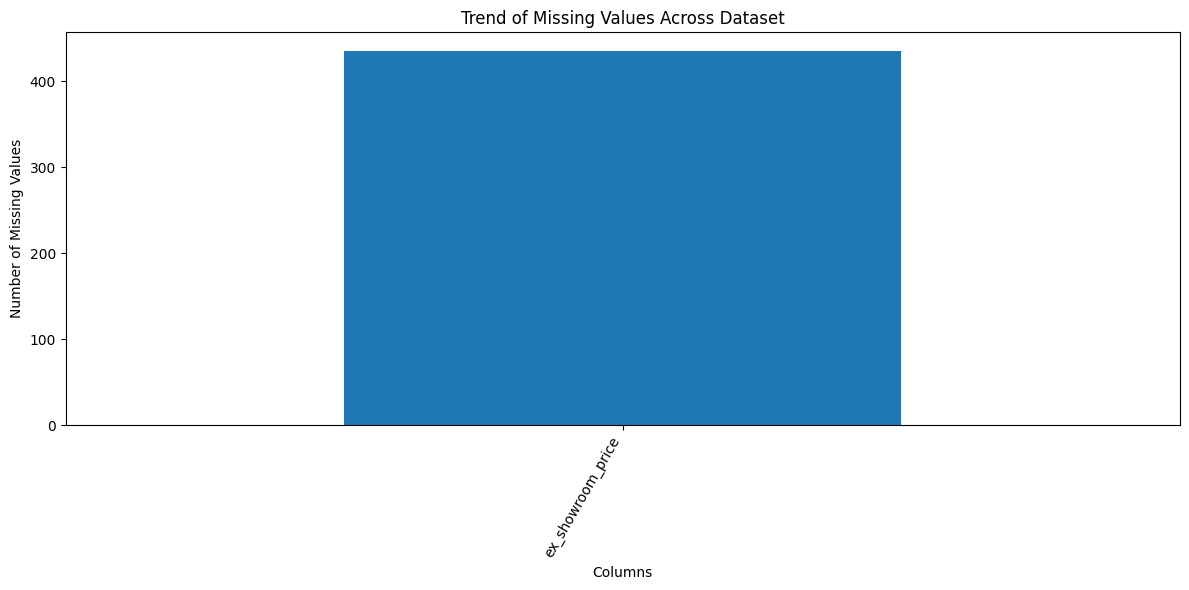

In [ ]:
missing_values =df.isnull().sum()

missing_values= missing_values[missing_values>0]

if not missing_values.empty:
  plt.figure(figsize=(12, 6))
  missing_values.plot(kind='bar')
  plt.title('Trend of Missing Values Across Dataset')
  plt.xlabel('Columns')
  plt.ylabel('Number of Missing Values')
  plt.xticks(rotation=60, ha='right')
  plt.tight_layout()
  plt.show()
else:
    print("No missing values found in the dataset.")


8:What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
highest=df['ex_showroom_price'].max()
Bike_name = df.loc[df['ex_showroom_price']== highest, "name"].iloc[0]


print(f"The highest ex-showroom price is: {highest}")
print(f"The bike with the highest price is: {Bike_name}")

The highest ex-showroom price is: 1278000.0
The bike with the highest price is: Harley-Davidson Street Bob


9:What is the total number of bikes listed by each seller type?

In [ ]:
total_number_of_bikes= df['seller_type'].value_counts()
print(f"The Total Number of Bikes:{total_number_of_bikes}")


The Total Number of Bikes:seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10:What is the relationship between selling_price and km_driven for first-owner bikes?

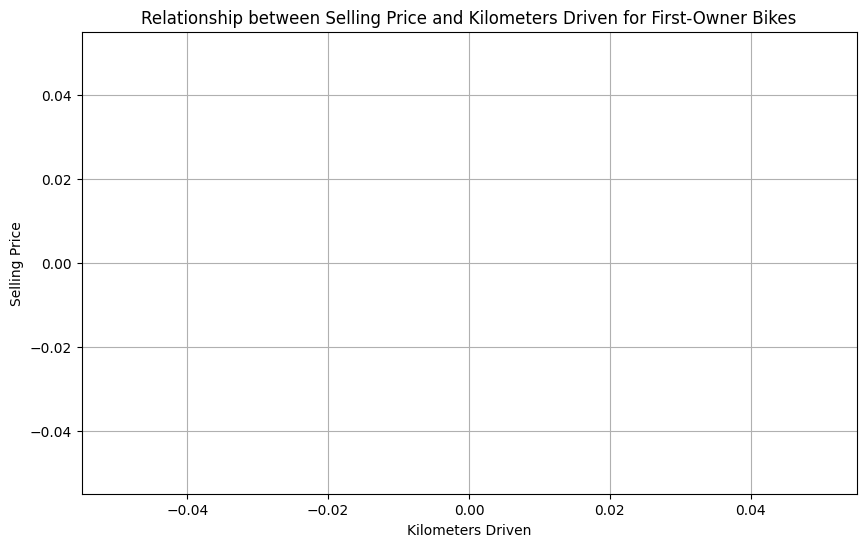

Correlation: nan


In [ ]:
df_first_owner = df[df['owner'] == 'First Owner']

plt.figure(figsize=(10, 6))
plt.scatter(df_first_owner['km_driven'], df_first_owner['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df_first_owner['selling_price'].corr(df_first_owner['km_driven'])
print(f"Correlation: {correlation}")



11: Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)
IQR=Q3-Q1
lower_bond=Q1-IQR*1.5
upper_bond=Q3+IQR*1.5
df_outlers=df[(df['km_driven']<lower_bond) | (df['km_driven']>upper_bond)]
df_no_ouliers=df[(df['km_driven']>=lower_bond) & (df['km_driven']<=upper_bond)]
print(f"DataFrame shape before removing outliers: {df.shape}")
print(f"Number of outliers removed: {df_outlers.shape[0]}")
print(f"DataFrame shape after removing outliers: {df_no_ouliers.shape}")
print(f"Outliers :{df_outlers}")





DataFrame shape before removing outliers: (1061, 7)
Number of outliers removed: 39
DataFrame shape after removing outliers: (1022, 7)
Outliers :                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus     

12: Perform a bivariate analysis to visualize the relationship between year and selling_price?

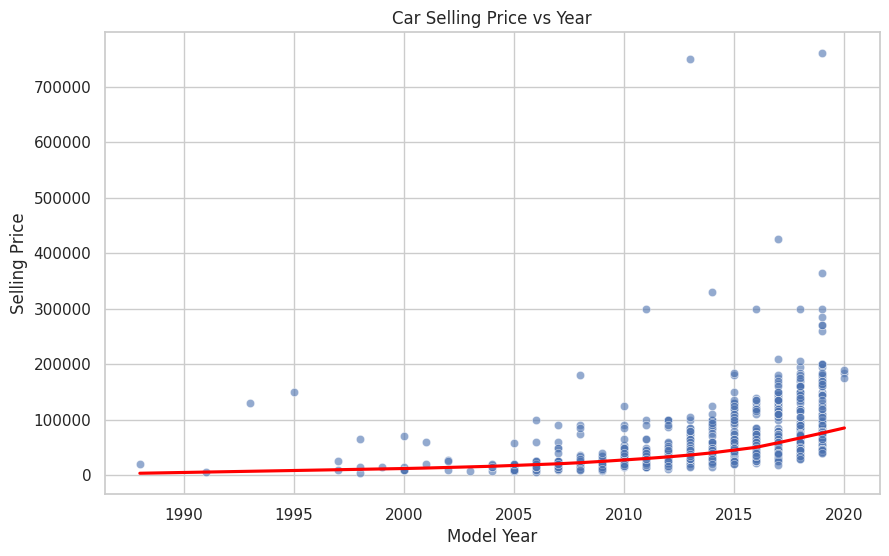

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter points
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.6)

# Fit a regression line (can choose lowess for non-linear trends)
sns.regplot(data=df, x="year", y="selling_price",
            scatter=False, color="red", lowess=True)

plt.title("Car Selling Price vs Year")
plt.xlabel("Model Year")
plt.ylabel("Selling Price")
plt.show()

13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
current_year = 2024 # Assuming the current year is 2024

df['bike_age'] = current_year - df['year']
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean().diff().mean()

print(f"The average depreciation in selling price per year of bike's age is: {average_depreciation_by_age:.2f}")


The average depreciation in selling price per year of bike's age is: -6049.38


14:Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
Average_price = df.groupby('year')['selling_price'].mean()
df['avg_price'] = df['year'].map(Average_price)
above_avg = df[df['selling_price'] > df['avg_price']]
for idx, row in above_avg.iterrows():
  name = row['name']
  price = row['selling_price']
  print(f"Bike name priced significantly above the average price: {name},{price}")



Bike name priced significantly above the average price: Royal Enfield Classic 350,175000
Bike name priced significantly above the average price: Royal Enfield Classic Gunmetal Grey,150000
Bike name priced significantly above the average price: Yamaha Fazer FI V 2.0 [2016-2018],65000
Bike name priced significantly above the average price: Royal Enfield Bullet 350 [2007-2011],180000
Bike name priced significantly above the average price: Yamaha YZF R3,365000
Bike name priced significantly above the average price: Jawa 42,185000
Bike name priced significantly above the average price: Hero Honda Glamour,25000
Bike name priced significantly above the average price: Yamaha YZF R15 S,40000
Bike name priced significantly above the average price: Royal Enfield Classic Gunmetal Grey,150000
Bike name priced significantly above the average price: Yamaha FZ25,120000
Bike name priced significantly above the average price: Jawa Standard,180000
Bike name priced significantly above the average price: R

15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.

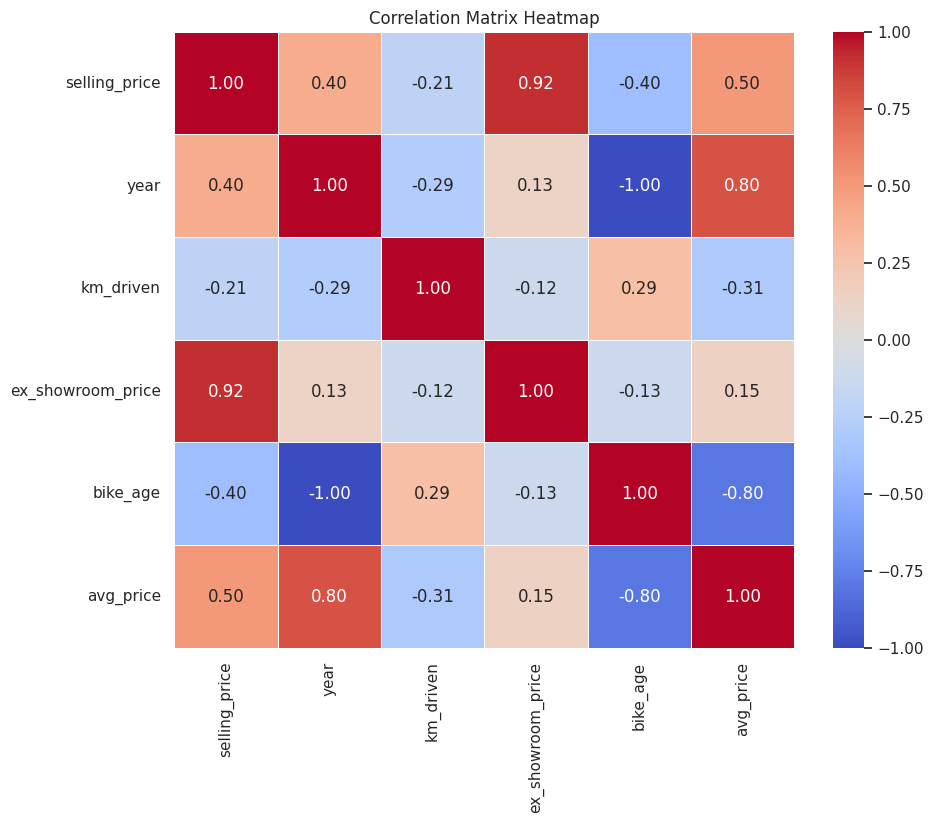

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


EDA - 2
CAR DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale (1).xlsx to Car Sale (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('Car Sale (1).xlsx')

1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?

The Avg Price of the dealers are:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.8

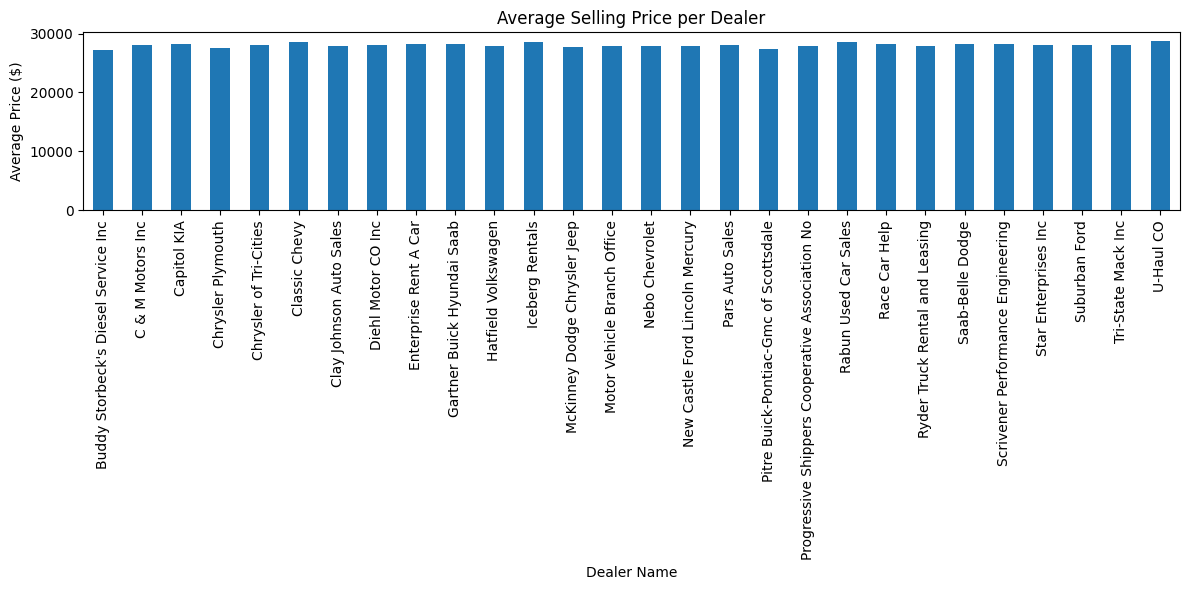

In [ ]:
Avg_price=df.groupby('Dealer_Name')['Price ($)'].mean()
print(f"The Avg Price of the dealers are:\n{Avg_price}")

#comparision between the dealer
print("\nThe comparision between the dealers are :")
print(f"Dealer with most avg price :{Avg_price.idxmax()}")
print(f"Dealer with min avg price :{Avg_price.idxmin()}")

#graphical representation
plt.figure(figsize=(12, 6))
Avg_price.plot(kind='bar')
plt.title('Average Selling Price per Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

2:Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
null_value=df['Price ($)'].isnull().sum()
print(f"Number of null Values in price:{null_value}")

price_variation_by_company=df.groupby('Company') ['Price ($)'].std()
Highest_variation_company=price_variation_by_company.idxmax()
Highest_variation_Price=price_variation_by_company.max()
print(f"The highest Variation comapny is:{Highest_variation_company}")
print(f"The highest varition Price is:{Highest_variation_Price}")
print(f"The '{highest_variation_company}' brand shows the highest price variation.")
print("This could indicate several factors about its pricing trends, such as:")
print("- A wide range of models, from entry-level to luxury.")
print("- Significant differences in features, options, or trim levels within the brand.")
print("- A mix of new and used cars with considerable depreciation differences.")
print("- Variability in pricing strategies across different dealerships or markets.")
print("\nFurther analysis (like looking at the minimum, maximum, and distribution of prices for this brand) would be needed to confirm these interpretations.")

Number of null Values in price:0
The highest Variation comapny is:Lincoln
The highest varition Price is:19658.050211265567
The 'Lincoln' brand shows the highest price variation.
This could indicate several factors about its pricing trends, such as:
- A wide range of models, from entry-level to luxury.
- Significant differences in features, options, or trim levels within the brand.
- A mix of new and used cars with considerable depreciation differences.
- Variability in pricing strategies across different dealerships or markets.

Further analysis (like looking at the minimum, maximum, and distribution of prices for this brand) would be needed to confirm these interpretations.


3:What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

The distrbution of car prices fpr each transmission type is:Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


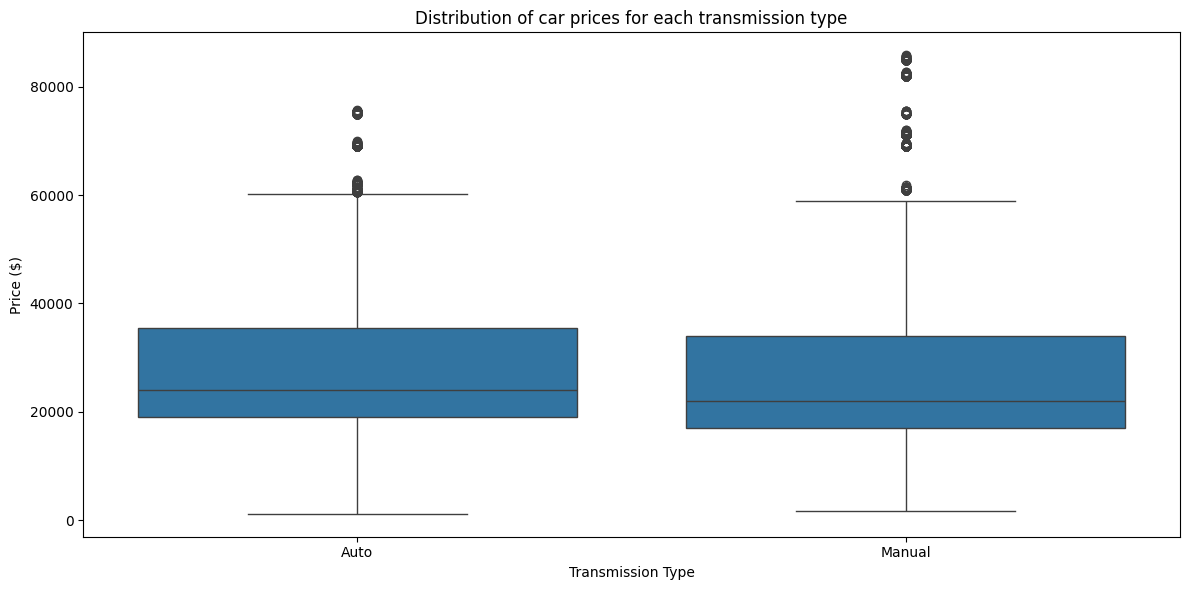

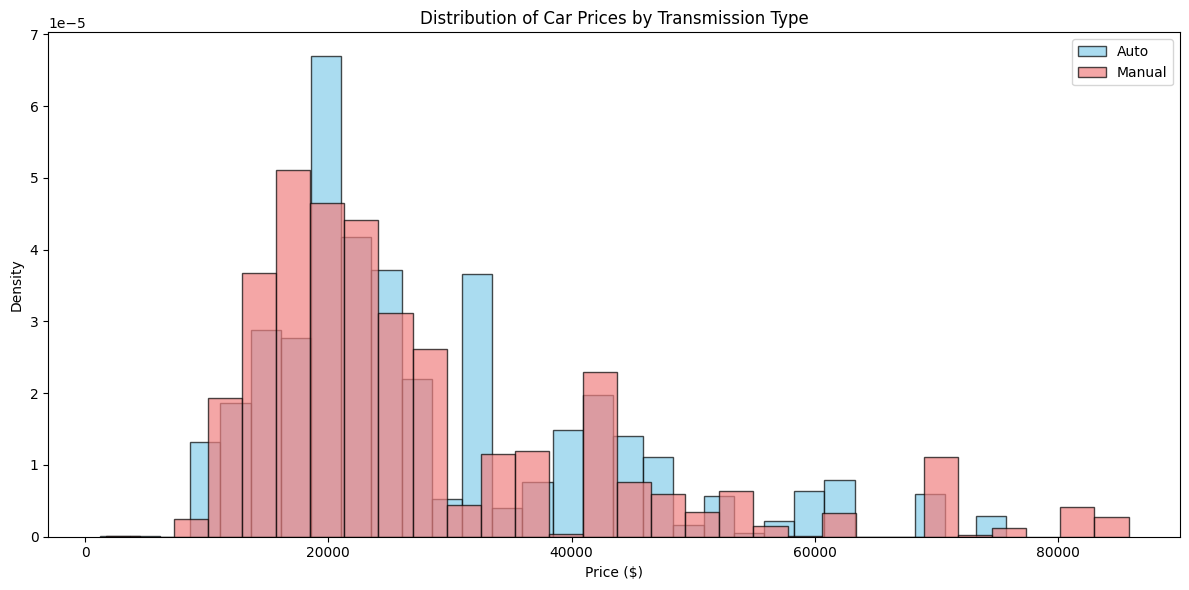

In [ ]:
iqr_by_transmission=df.groupby("Transmission")['Price ($)'].apply(lambda x: x.quantile(0.75)-x.quantile(0.25))
print(f"The distrbution of car prices fpr each transmission type is:{iqr_by_transmission}")

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Distribution of car prices for each transmission type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


# Plot histograms for each transmission type
plt.figure(figsize=(12, 6))

auto_prices = df[df['Transmission'] == 'Auto']['Price ($)']
manual_prices = df[df['Transmission'] == 'Manual']['Price ($)']

plt.hist(auto_prices, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Auto')
plt.hist(manual_prices, bins=30, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Manual')

plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

4: What is the distribution of car prices across different regions?

In [ ]:
df['Dealer_Region'].isnull().sum()

np.int64(0)

In [ ]:
df['Price ($)'].isnull().sum()

np.int64(0)

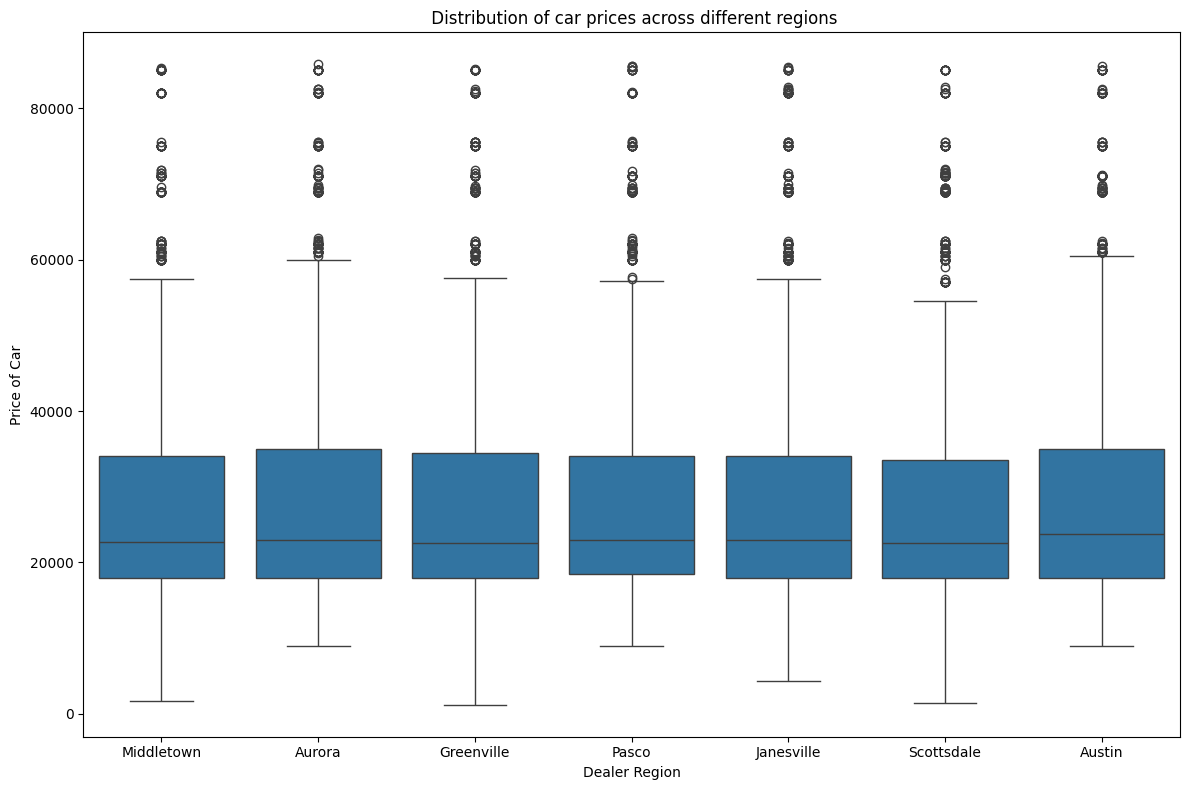

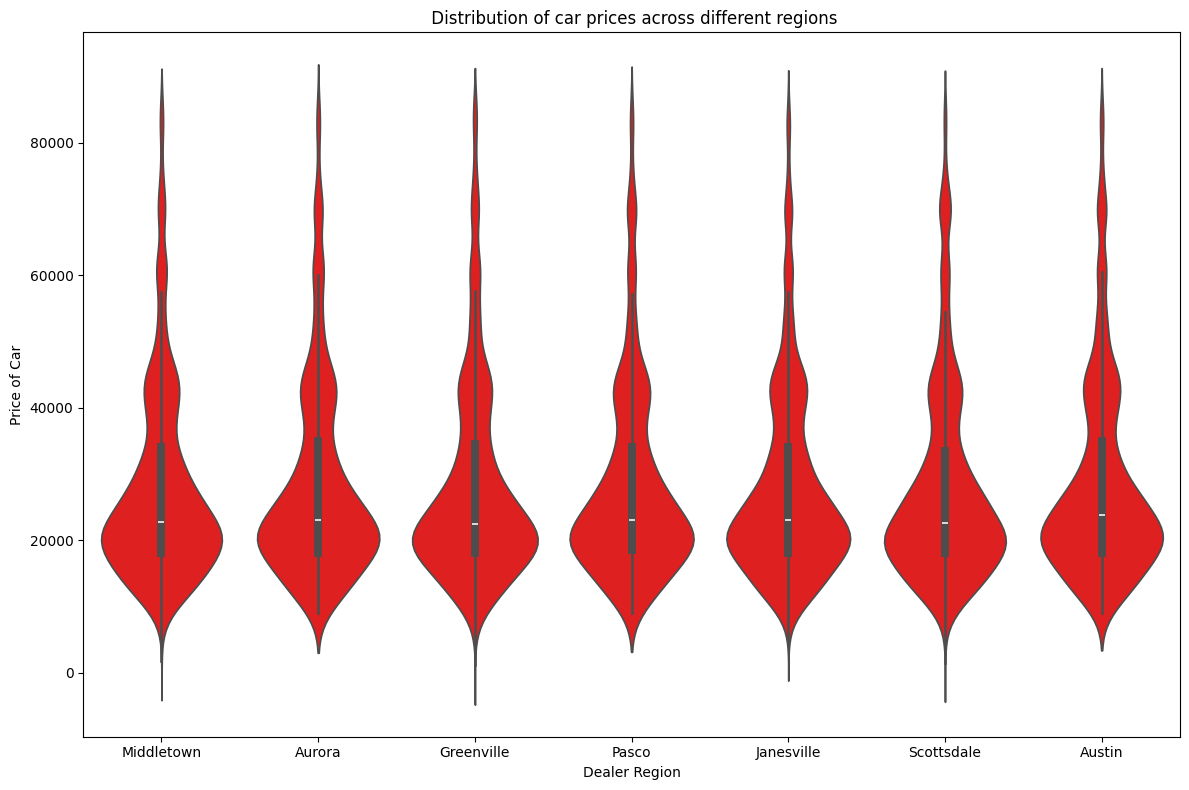

In [ ]:
#Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title(' Distribution of car prices across different regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price of Car')
plt.tight_layout()
plt.show()


#violinplot
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='Dealer_Region', y='Price ($)',color='red')
plt.title(' Distribution of car prices across different regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price of Car')
plt.tight_layout()
plt.show()



5: What is the distribution of cars based on body styles?

Distributions of cars based on body style are:Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


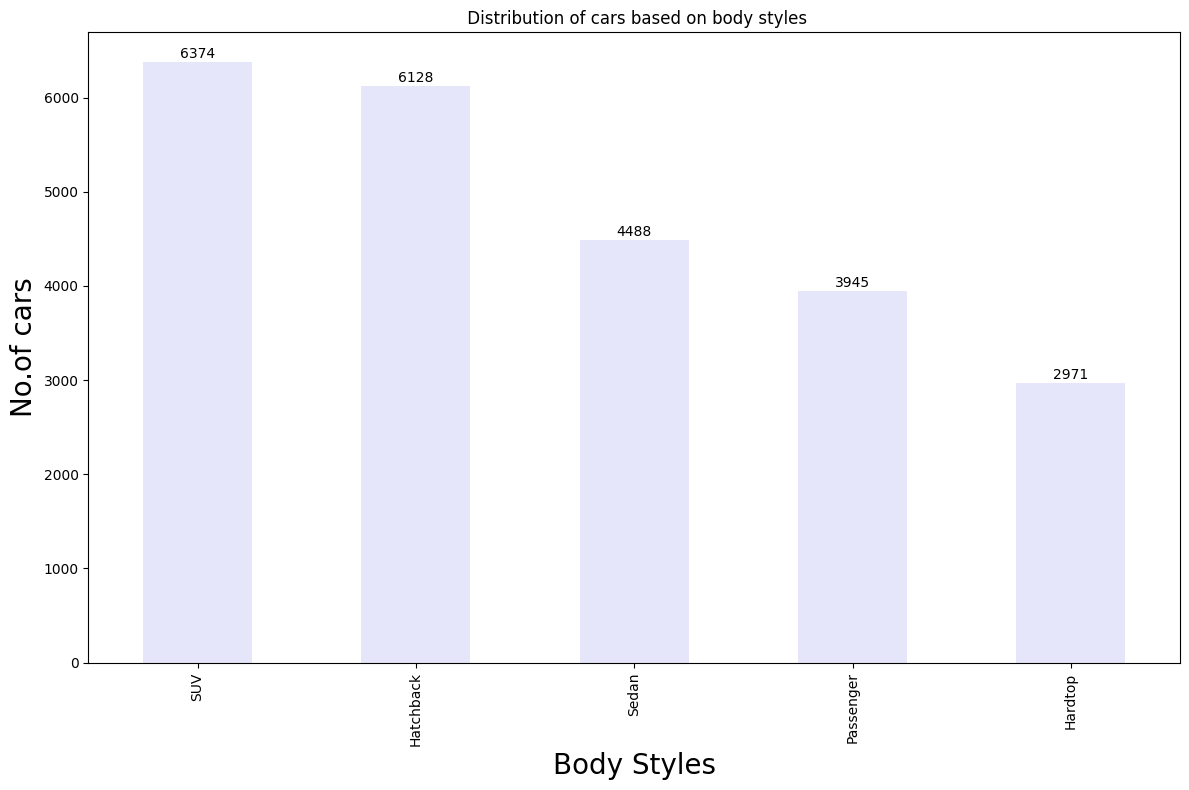

In [ ]:
distribution_cars=df['Body Style'].value_counts()
print(f"Distributions of cars based on body style are:{distribution_cars}")
plt.figure(figsize=(12,8))
distribution_cars.plot(kind='bar',color='lavender')
for i, v in enumerate(distribution_cars):
    plt.text(i, v+10, str(v), ha = 'center', va='bottom', fontsize = 10)
plt.title(' Distribution of cars based on body styles')
plt.xlabel('Body Styles',fontsize=20)
plt.ylabel('No.of cars',fontsize=20)
plt.tight_layout()
plt.show()


6:How does the average selling price of cars vary by customer gender and annual income?

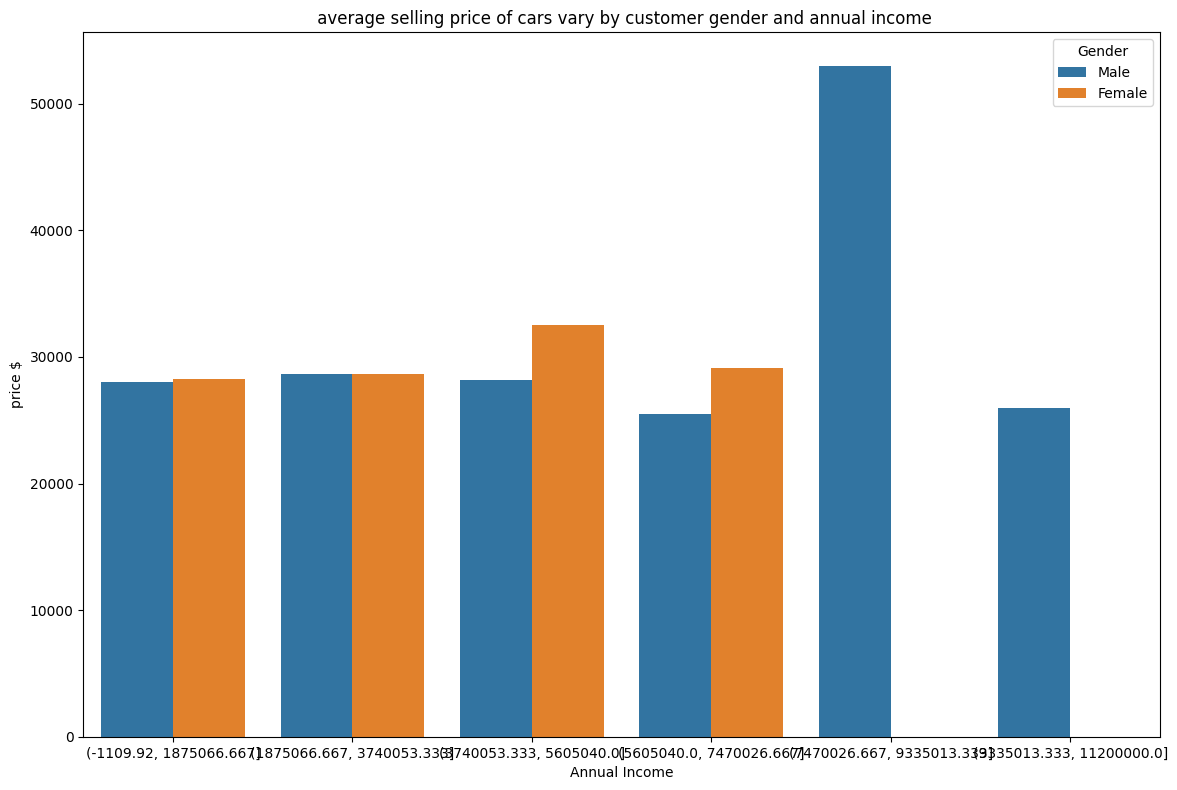

In [ ]:
df.groupby(['Gender','Annual Income']) ['Price ($)'].mean()
df['Income bin']=pd.cut(df['Annual Income'],bins=6)

#graphical represntation
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Income bin',y='Price ($)',hue='Gender',ci=None)
plt.title(' average selling price of cars vary by customer gender and annual income')
plt.xlabel('Annual Income')
plt.ylabel('price $')
plt.tight_layout()
plt.show()

In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-02-01 00:00:00,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-02-01 00:00:00,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-02-01 00:00:00,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-02-01 00:00:00,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-02-01 00:00:00,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÃ‚Â Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÃ‚Â Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


7:What is the distribution of car prices by region, and how does the number of cars sold vary by region?

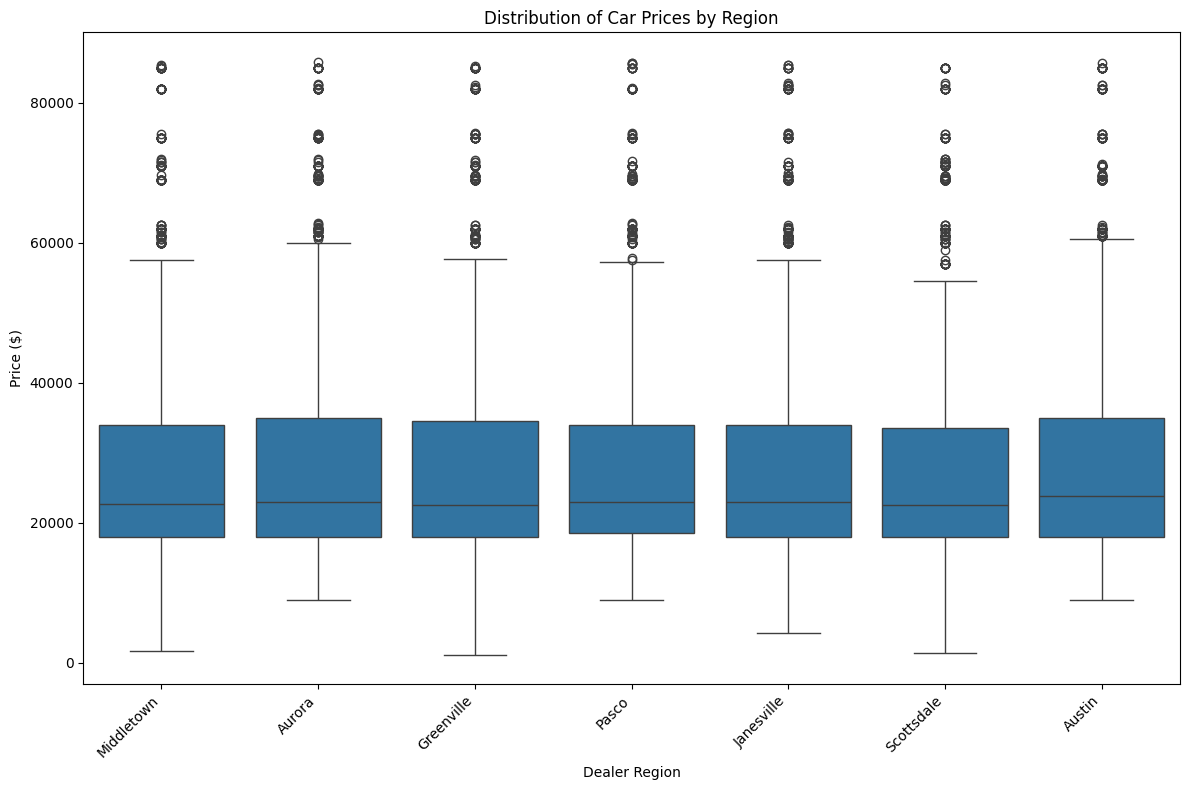

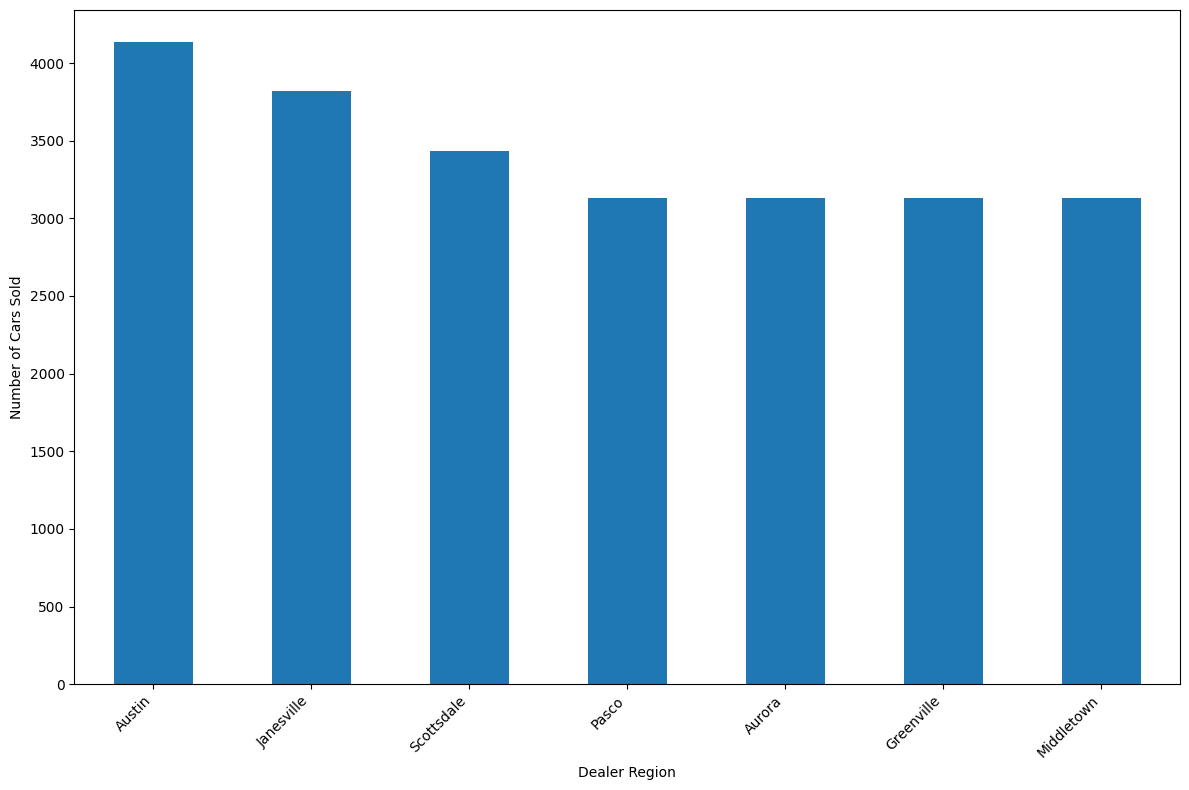

Number of cars sold by region:{Number_of_car}


In [ ]:

#Distribution of car proces by region
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Dealer_Region',y='Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Number of car sold by region
Number_of_car=df['Dealer_Region'].value_counts()
plt.figure(figsize=(12,8))
Number_of_car.plot(kind='bar')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Number of cars sold by region:{Number_of_car}")




8: How does the average car price differ between cars with different engine sizes?

Average car price differ by engine:Engine
DoubleÃ‚Â Overhead Camshaft    28248.525972
Overhead Camshaft              27914.710631
Name: Price ($), dtype: float64


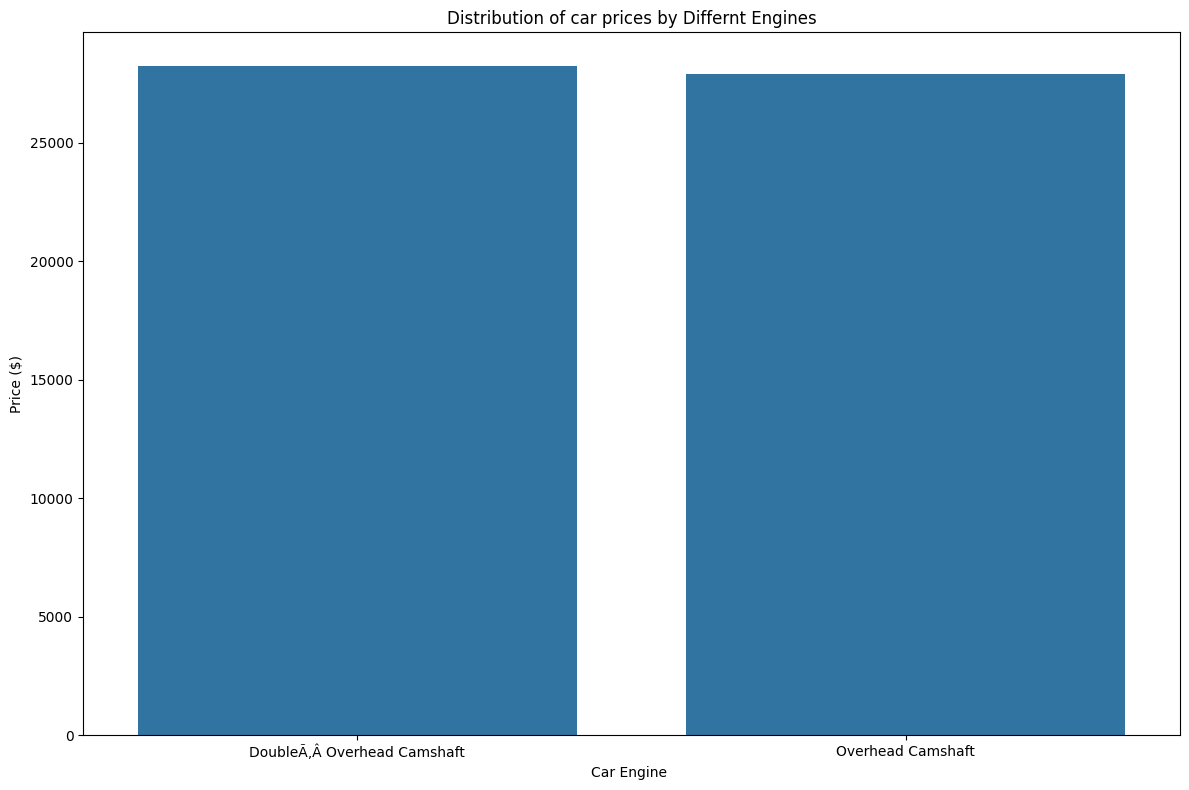

In [ ]:
Average_car_price=df.groupby('Engine')['Price ($)'].mean()
print(f"Average car price differ by engine:{Average_car_price}")

#Graphical Representation
plt.figure(figsize=(12,8))
sns.barplot(data=Average_car_price.reset_index(),x='Engine',y='Price ($)')
plt.title('Distribution of car prices by Differnt Engines')
plt.xlabel('Car Engine ')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

9: How do car prices vary based on the customer’s annual income bracket?

,count
Income_Bracket,
Medium,5981
Low,5979
Very high,5977
High,5969


,count,mean,std,min,25%,50%,75%,max
Income_Bracket,,,,,,,,
Low,5979.0,27954.276468,14953.112938,1200.0,18000.0,22001.0,34000.0,85001.0
Medium,5981.0,27974.380371,14612.713940,4200.0,18000.0,23000.0,34000.0,85500.0
High,5969.0,28288.664936,14967.662327,9000.0,18500.0,23001.0,34001.0,85600.0
Very high,5977.0,28144.058223,14618.748518,1450.0,18500.0,23000.0,34001.0,85800.0


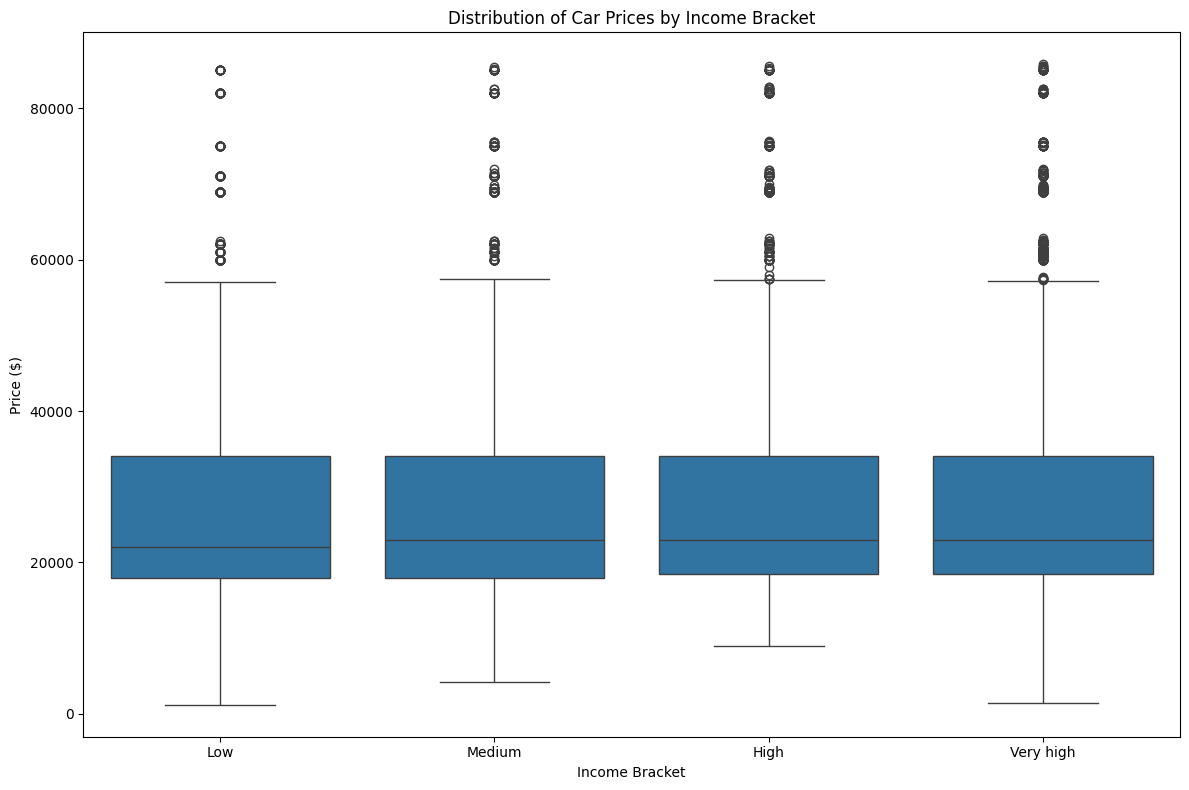

In [ ]:
income_bins=df['Annual Income'].quantile([0,0.25,0.50,0.75,1]).tolist()
income_labels=['Low','Medium','High','Very high']
df['Income_Bracket']= pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, include_lowest=True)
display(df['Income_Bracket'].value_counts())

price_by_income = df.groupby('Income_Bracket')['Price ($)'].describe()
display(price_by_income)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.title('Distribution of Car Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


10:What are the top 5 car models with the highest number of sales, and how does their price distribution look?


Highest number of Sales:Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


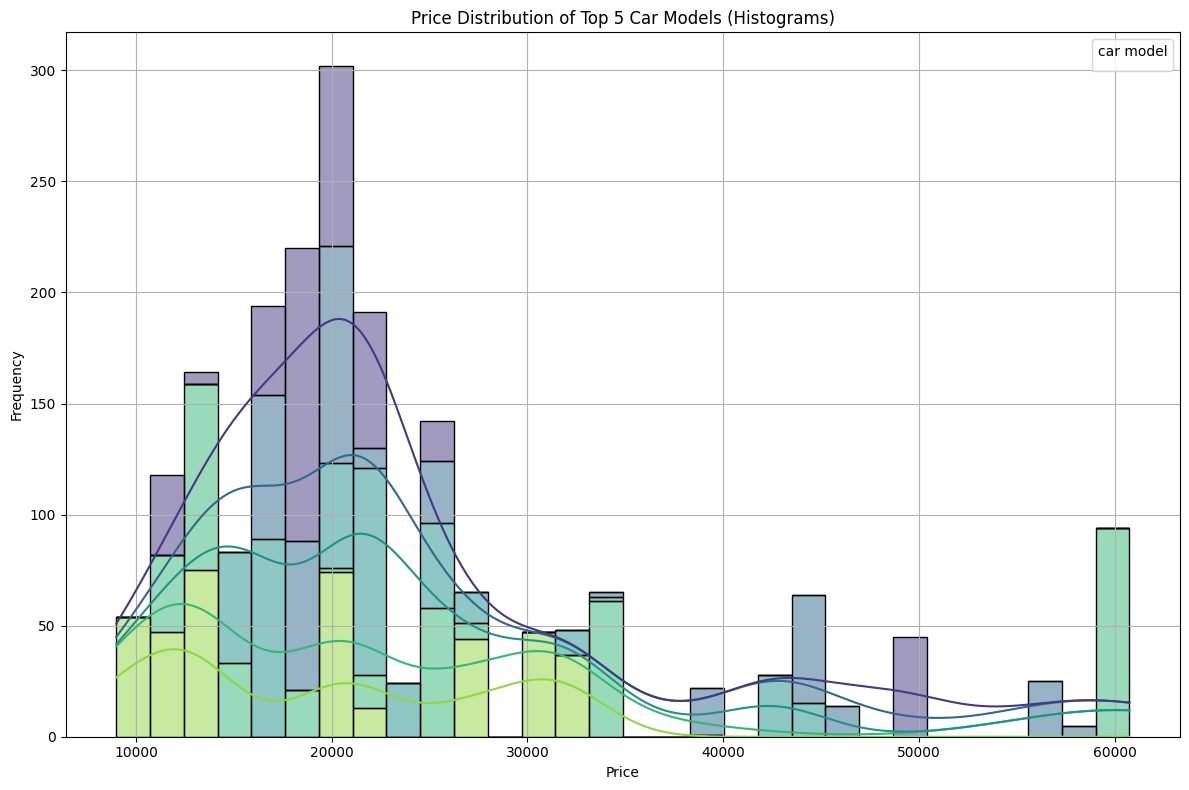

In [ ]:
top_model=df['Model'].value_counts().head()
print(f"Highest number of Sales:{top_model}")

df_top5=df[df['Model'].isin(top_model.index)]

plt.figure(figsize=(12,8))
sns.histplot(data=df_top5, x='Price ($)',hue='Model',kde=True,bins=30,multiple='stack',palette='viridis')
plt.title("Price Distribution of Top 5 Car Models (Histograms)")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='car model')
plt.grid(True)
plt.tight_layout()
plt.show()

11:How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

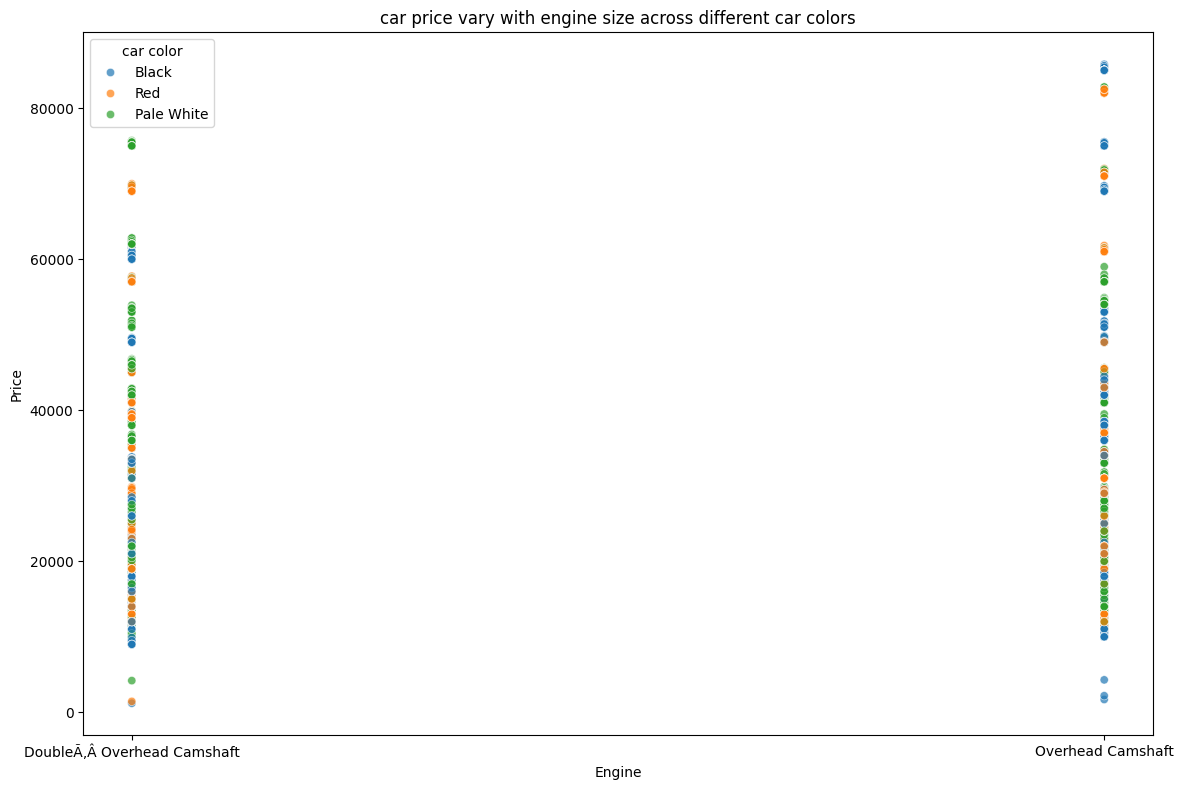

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Engine',y='Price ($)',hue='Color',palette='tab10',alpha=0.7)
plt.title('car price vary with engine size across different car colors')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.legend(title='car color',loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
vary=df.groupby(['Engine','Color'])['Price ($)'].std().sort_values(ascending=False)
print(f"car price vary with engine size across different car colors:{vary}")


car price vary with engine size across different car colors:Engine                       Color     
Overhead Camshaft            Black         17457.405345
                             Red           17346.642554
DoubleÃ‚Â Overhead Camshaft  Pale White    14402.413401
                             Red           13499.354247
Overhead Camshaft            Pale White    13000.103061
DoubleÃ‚Â Overhead Camshaft  Black         12418.674126
Name: Price ($), dtype: float64


Highest car price vary with engine size across different car colors:('Overhead Camshaft', 'Black') with car price 17457.405345376694


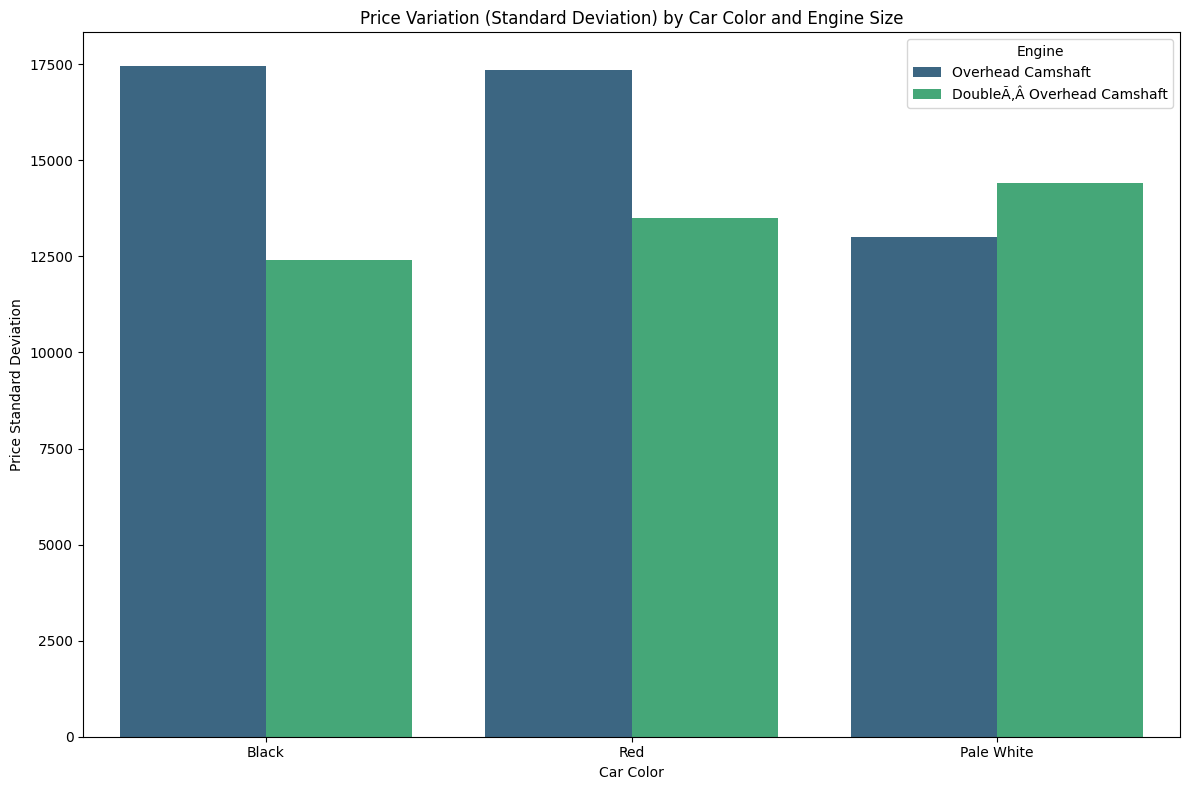

In [ ]:
highest_var_color = vary.idxmax()
highest_price = vary.max()
print(f"Highest car price vary with engine size across different car colors:{highest_var_color} with car price {highest_price}")

# Reset the index to make 'Engine' and 'Color' regular columns
vary_reset = vary.reset_index()

plt.figure(figsize=(12,8))
# Use the reset DataFrame for plotting
sns.barplot(data=vary_reset, x='Color', y='Price ($)', hue='Engine', palette='viridis')
plt.title("Price Variation (Standard Deviation) by Car Color and Engine Size")
plt.ylabel('Price Standard Deviation')
plt.xlabel('Car Color')
plt.tight_layout()
plt.show()

12:Is there any seasonal trend in car sales based on the date of sale?

Monthly Car Sales:
Month
1     1260
2     1165
3     1765
4     1760
5     2185
6     1715
7     1740
8     2130
9     2600
10    1980
11    2875
12    2731
Name: count, dtype: int64


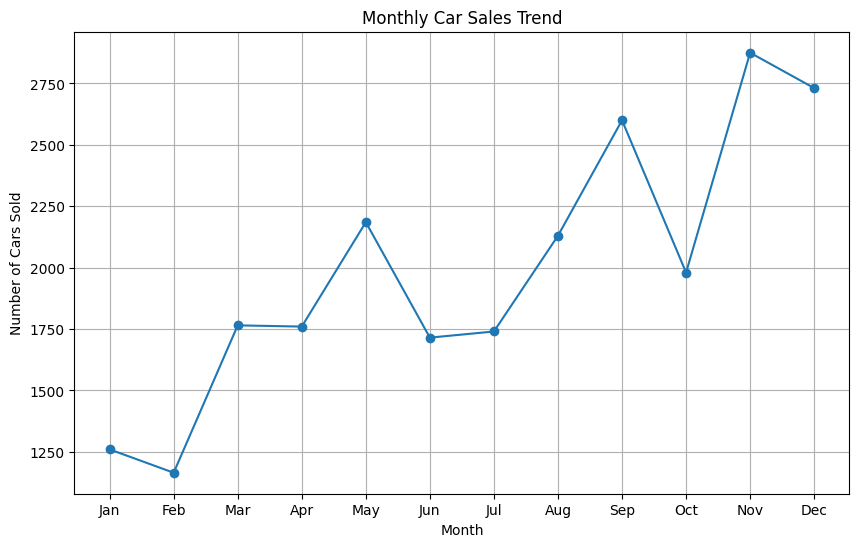

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

monthly_sales = df['Month'].value_counts().sort_index()

print("Monthly Car Sales:")
print(monthly_sales)

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

13:How does the car price distribution change when considering different combinations of body style and
transmission type?

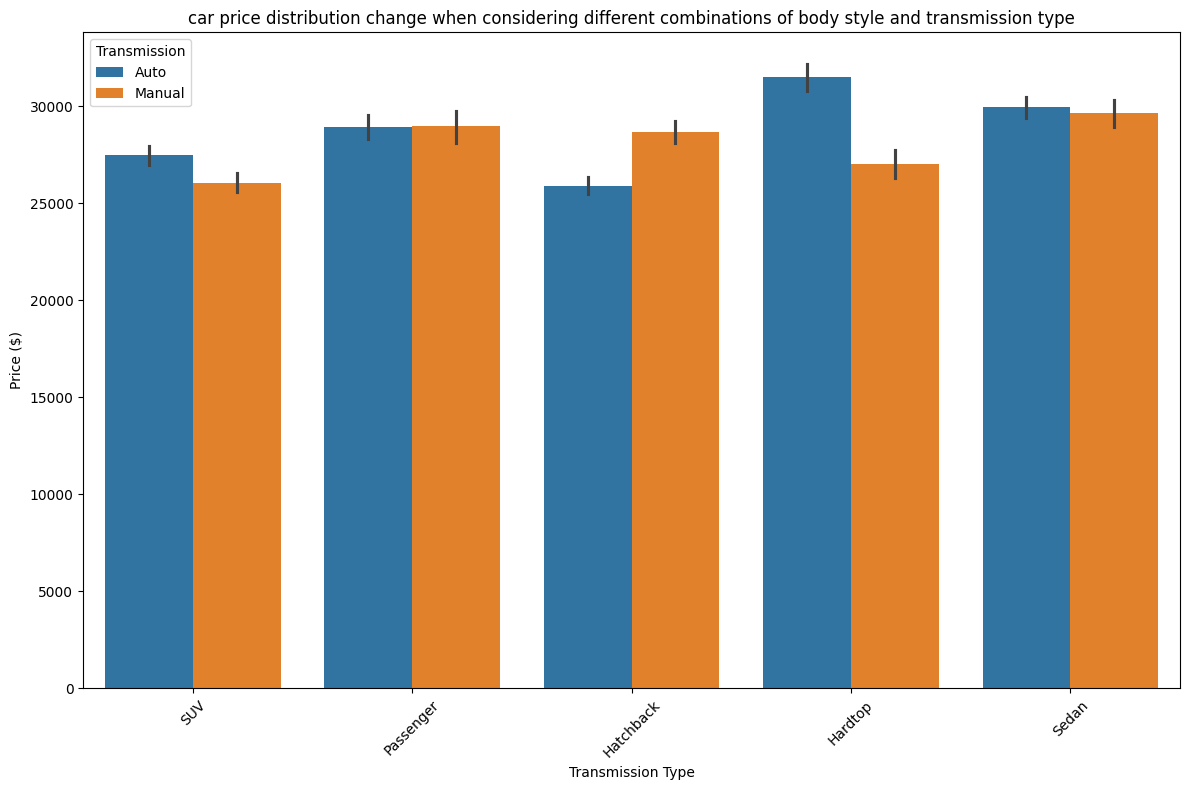

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Body Style',y='Price ($)',hue='Transmission')
plt.title("car price distribution change when considering different combinations of body style and transmission type")
plt.xlabel('Transmission Type')
plt.xticks(rotation=45)
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

15:How does the average car price vary across different car models and engine type?

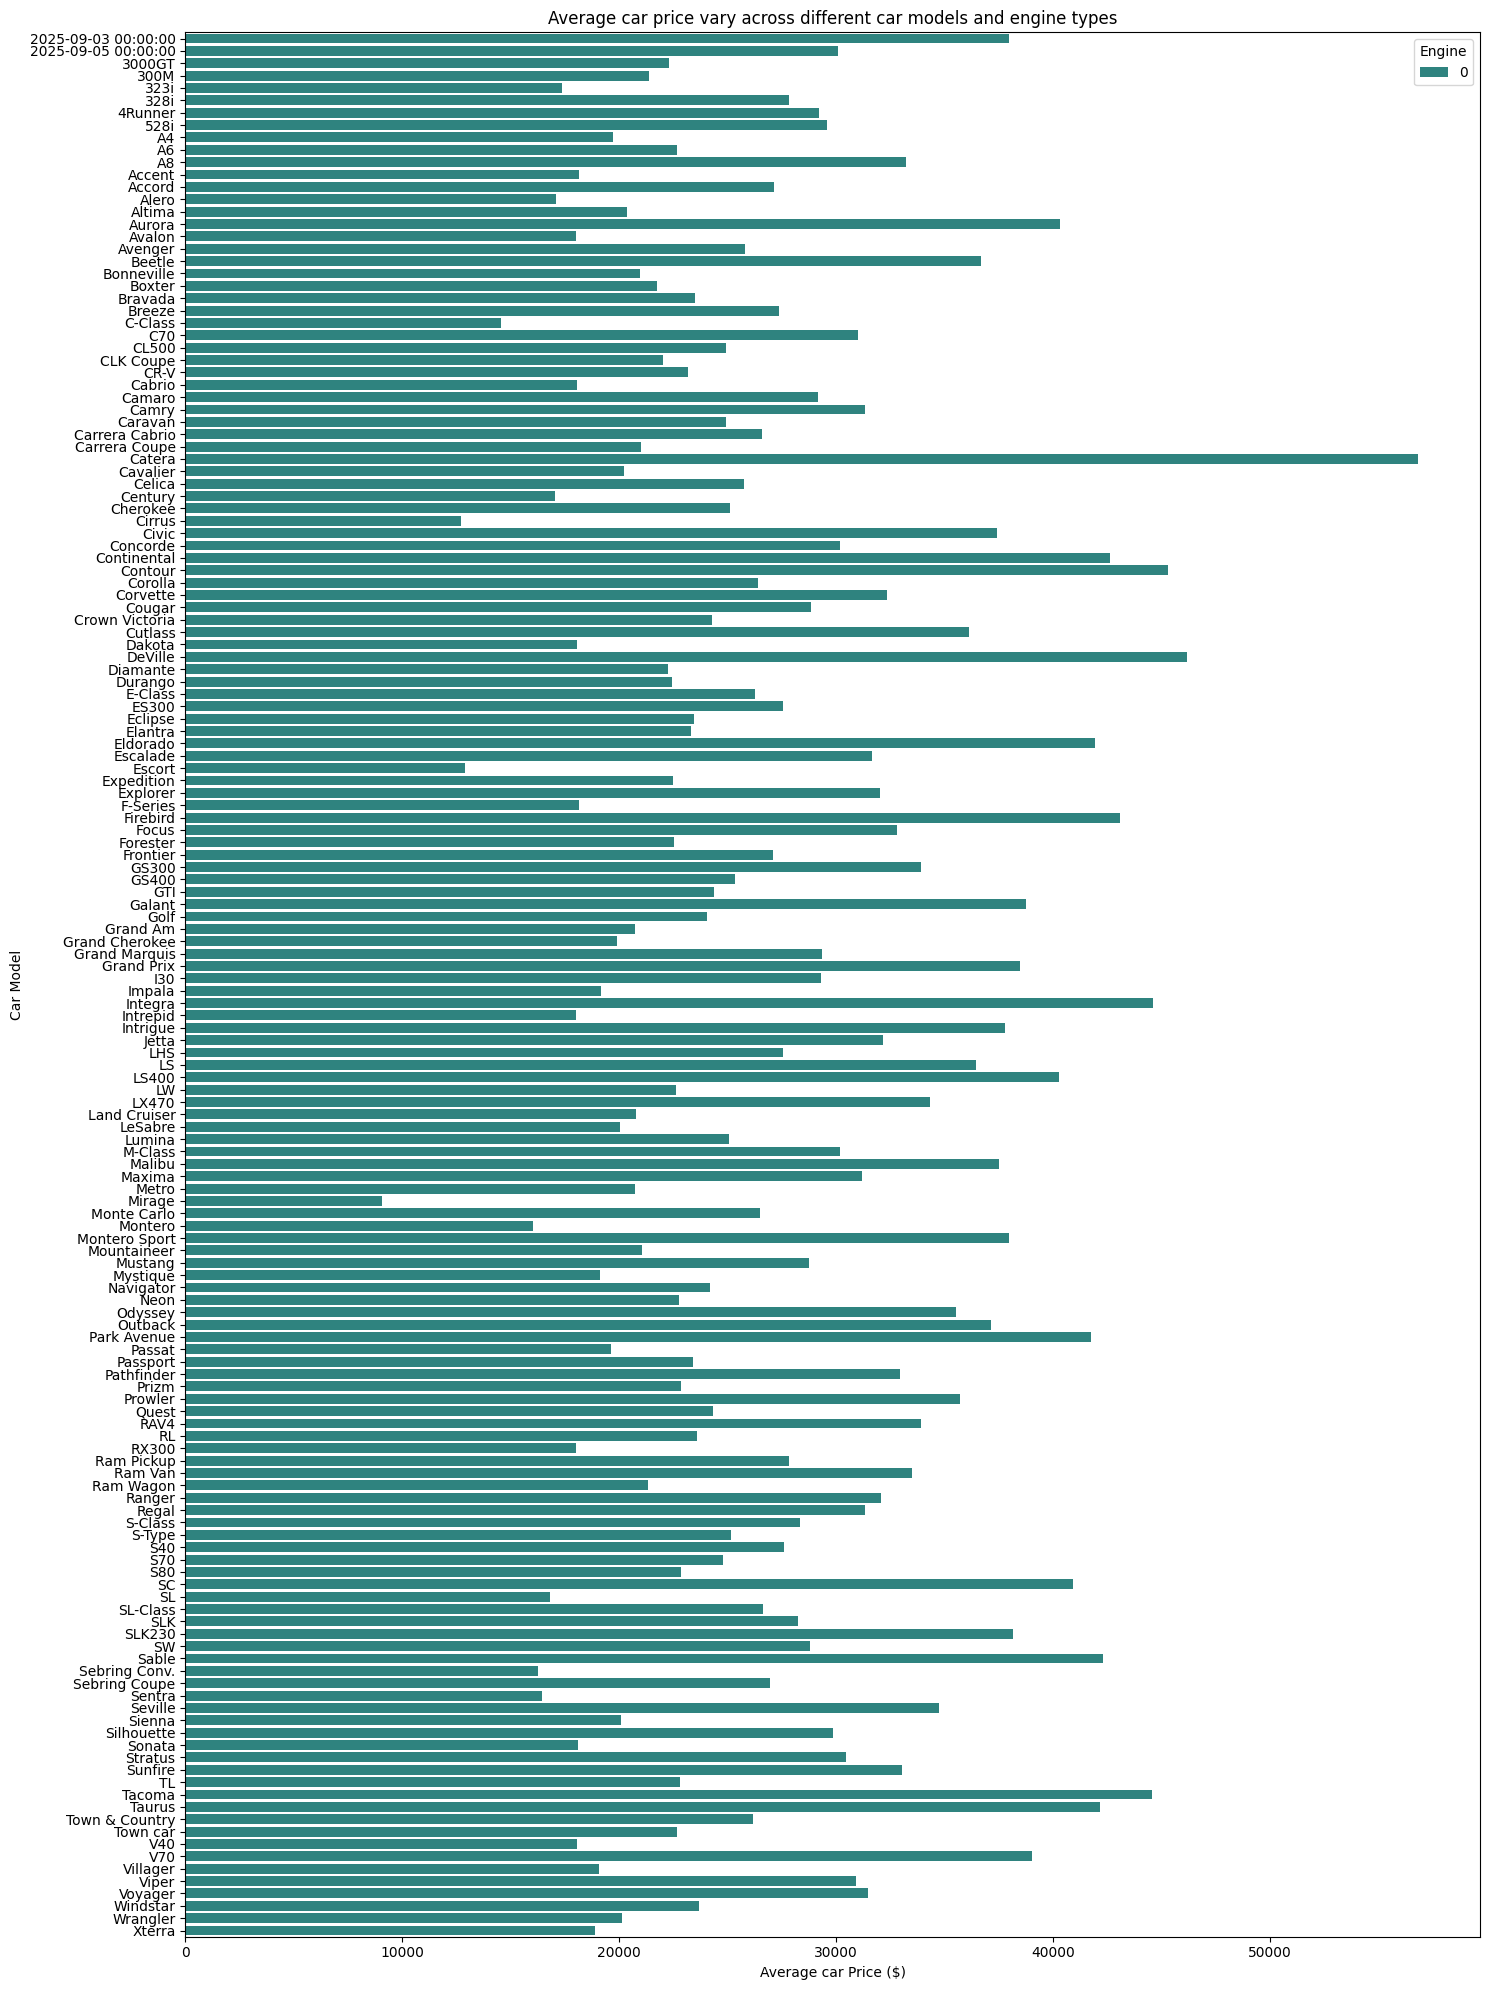

In [ ]:
avg_price_by_model = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(15, 20))
sns.barplot(x='Price ($)', y='Model', hue='Engine', data=avg_price_by_model, palette='viridis')
plt.title("Average car price vary across different car models and engine types")
plt.xlabel('Average car Price ($)')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


Amazon Sales Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.xlsx to amazon (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('amazon.xlsx')

1:What is the average rating for each product category?

In [ ]:
df['rating']=df['rating'].astype(str).str.replace('.','').str.replace('|','').str.replace('n','').str[0]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating_by_category = df.groupby('category')['rating'].mean()
print("Average Rating for Each Product Category:")
print(average_rating_by_category)


Average Rating for Each Product Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.0
                                                                                                                         ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

2: What are the top rating_count products by category?

In [ ]:
top_products_by_rating_count = df.loc[df.groupby('category')['rating_count'].idxmax()]


top_products_display = top_products_by_rating_count[['category', 'product_name', 'rating_count']]

print("Top Product by Rating Count for Each Category:")
display(top_products_display)

Top Product by Rating Count for Each Category:


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
748,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352.0
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792.0
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199.0
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719.0
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308.0


3:What is the distribution of discounted prices vs. actual prices?

In [ ]:
df['discounted_price']=df['discounted_price'].astype(str).str.replace(r'[^\d.]','',regex=True)

In [ ]:
df.discounted_price.values

array(['399', '199', '199', ..., '2219', '1399', '2863'], dtype=object)

In [ ]:
df['actual_price']=df['actual_price'].astype(str).str.replace(r'[^\d.]','',regex=True)

In [ ]:
df.actual_price.values

array(['1099', '349', '1899', ..., '3080', '1890', '3690'], dtype=object)

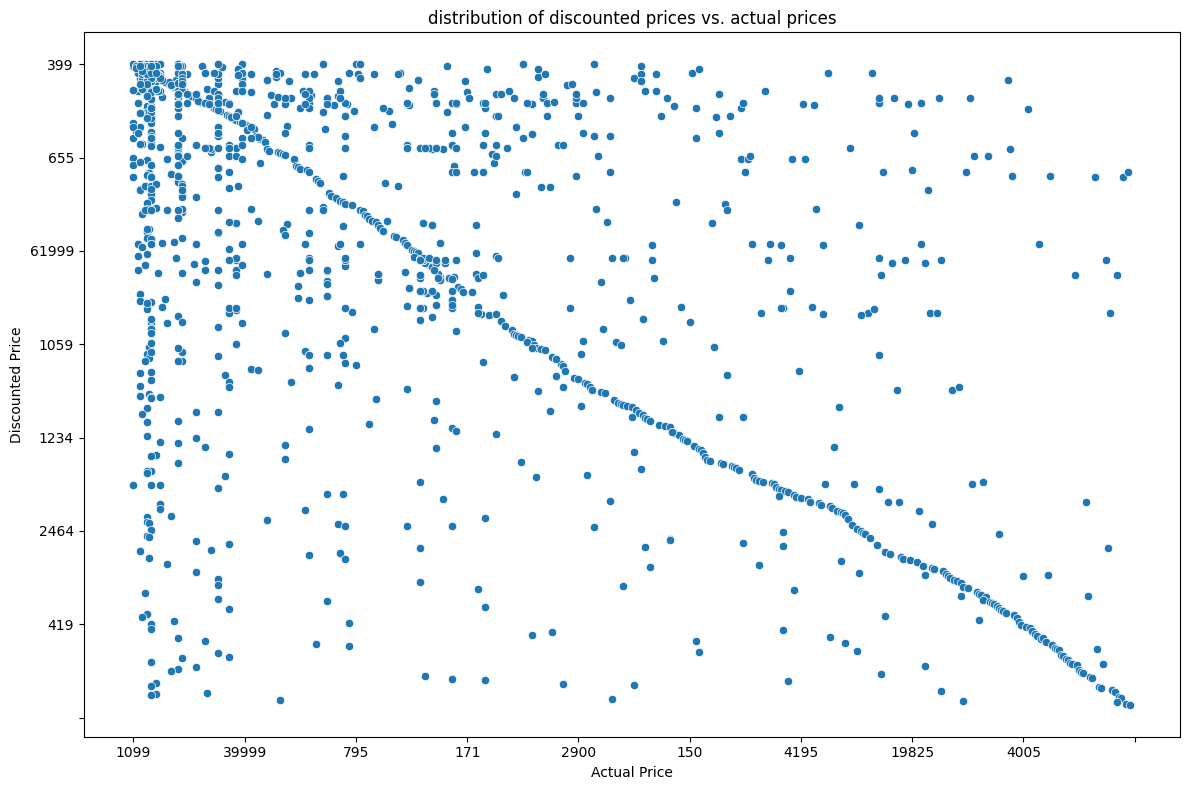

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='actual_price',y='discounted_price')
plt.title('distribution of discounted prices vs. actual prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()

4: How does the average discount percentage vary across categories?

 Average discount percentage vary across categories:                                              category  discount_percentage
6    Computers&Accessories|Accessories&Peripherals|...                0.900
75   Electronics|Headphones,Earbuds&Accessories|Ear...                0.900
106  Electronics|Mobiles&Accessories|MobileAccessor...                0.900
73   Electronics|Headphones,Earbuds&Accessories|Ada...                0.880
14   Computers&Accessories|Accessories&Peripherals|...                0.875
..                                                 ...                  ...
197  OfficeProducts|OfficeElectronics|Calculators|F...                0.000
199  OfficeProducts|OfficePaperProducts|Paper|Copy&...                0.000
205  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.000
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.000
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                0.000

[211 rows x 2 columns]


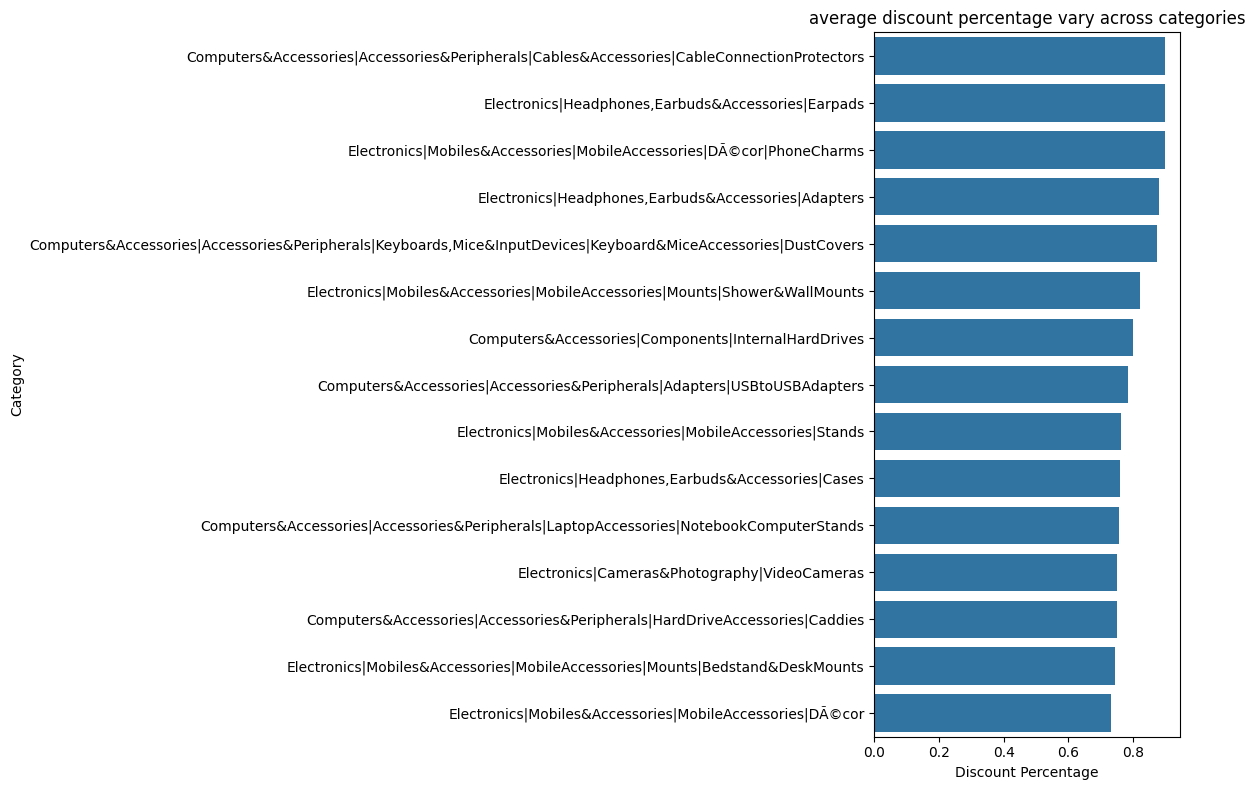

In [ ]:
avg_discounted_per=df.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount_category=avg_discounted_per.sort_values(by='discount_percentage',ascending=False)
top_categories=avg_discount_category.head(15)
print(f' Average discount percentage vary across categories:{avg_discount_category}')

plt.figure(figsize=(12,8))
sns.barplot(data=top_categories,x='discount_percentage',y='category')
plt.title('average discount percentage vary across categories')
plt.xlabel('Discount Percentage')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

5:What are the most popular product names?

In [ ]:
popular_product=df.groupby('product_name')['rating_count'].count().reset_index()
popular_product=popular_product.sort_values(by='rating_count',ascending=False)
print(f'The Most Popular Product names are :{popular_product.head(10)}')

The Most Popular Product names are :                                          product_name  rating_count1
384  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...              5
386  Fire-Boltt Phoenix Smart Watch with Bluetooth ...              4
134  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...              3
118  Amazonbasics Nylon Braided Usb-C To Lightning ...              3
828  Portronics Konnect CL 20W POR-1067 Type-C to 8...              3
829  Portronics Konnect L 1.2M Fast Charging 3A 8 P...              3
390  Fire-Boltt Visionary 1.78" AMOLED Bluetooth Ca...              3
830  Portronics Konnect L 1.2M POR-1401 Fast Chargi...              3
324  Duracell USB C To Lightning Apple Certified (M...              3
655  MI Braided USB Type-C Cable for Charging Adapt...              3


6:What are the most popular product keywords?

7:What are the most popular product reviews?

In [ ]:
df['review_length'] = df['review_title'].str.len() + df['review_content'].str.len()
most_popular_reviews = df.sort_values(by='review_length', ascending=False)
print("Most popular product reviews based on combined title and content length:")
display(most_popular_reviews[['product_name', 'review_title', 'review_content', 'review_length']].head(10))

Most popular product reviews based on combined title and content length:


,product_name,review_title,review_content,review_length
1056,Philips GC1905 1440-Watt Steam Iron with Spray...,How to choose an iron ? This one-A decent comb...,Update as on 28.10.2018:**********************...,20335
656,Boult Audio Probass Curve Bluetooth Wireless i...,"Superb headphone one of the best,!!!Amazing pr...",I have just received my BoultCurve. Its really...,14939
718,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,It takes Forever - to transfer anything. Maybe...,Update:I returned the drive with money reverte...,13943
41,Mi 108 cm (43 inches) Full HD Android LED TV 4...,"DETAILED REVIEW after 3 WEEKS of Usage !!!,Pri...",NOTE:@ If you select brand-authorized TV insta...,13473
677,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...","NOt worth the money,Good budget smart watch wi...",Review OverviewAverage2.7The Boat today launch...,12137
420,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...","NOt worth the money,Good budget smart watch wi...",Review OverviewAverage2.7The Boat today launch...,12137
976,Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz R...,the only ANDROID tablet that makes sense in th...,first i would like to comment on the tab marke...,11629
691,"TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...",**UPDATE MARCH2021**Decent for a USB 2.0 Devic...,***This is the Update MARCH**.I want to make a...,11366
930,realme Buds Wireless in Ear Bluetooth Earphone...,"Original review ðŸ‘realme budsðŸŽ§,Please Rea...",(Realme Buds Wireless design and specificatio...,10973
777,"APC Back-UPS BX600C-IN 600VA / 360W, 230V, UPS...","Most featured UPS,Not Sufficient for a 65"" Son...",My office PC UPS Legrand Numeric UPS Digital ...,10823


8:What is the correlation between discounted_price and rating?

The correlation between discounted_price and rating:                  discounted_price    rating  actual_price
discounted_price          1.000000  0.114320      0.961915
rating                    0.114320  1.000000      0.109721
actual_price              0.961915  0.109721      1.000000


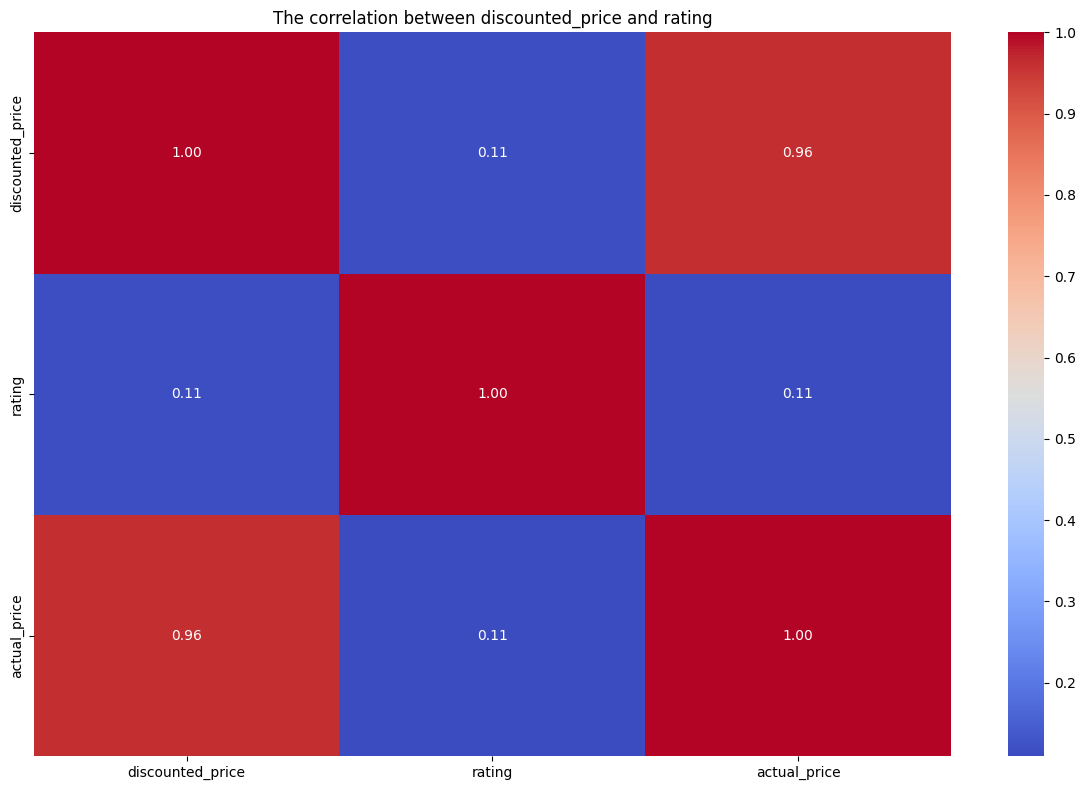

In [ ]:
df['discounted_price']=pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
num_cols=['discounted_price','rating', 'actual_price']
correlation=df[num_cols].corr()
print(f"The correlation between discounted_price and rating:{correlation}")

plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('The correlation between discounted_price and rating')
plt.tight_layout()
plt.show()

9:What are the Top 5 categories based on the highest ratings?

The Top_5  categories based on the highest ratings:                                              category  rating_count
10   Computers&Accessories|Accessories&Peripherals|...           233
119        Electronics|WearableTechnology|SmartWatches            76
117  Electronics|Mobiles&Accessories|Smartphones&Ba...            68
97   Electronics|HomeTheater,TV&Video|Televisions|S...            63
76   Electronics|Headphones,Earbuds&Accessories|Hea...            52


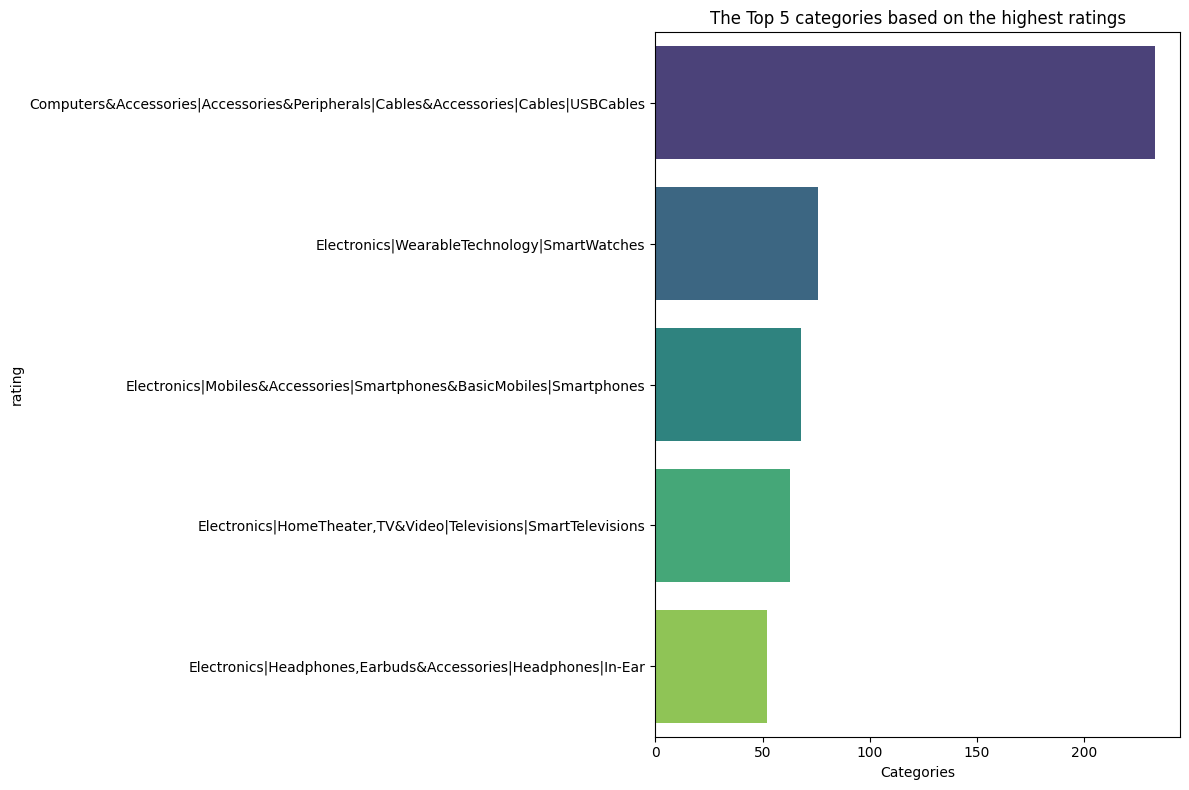

In [ ]:
top_5=df.groupby('category')['rating'].count().reset_index()
top_5=top_5.rename(columns={'rating':'rating_count'})
top_5=top_5.sort_values(by='rating_count',ascending=False)
print(f'The Top_5  categories based on the highest ratings:{top_5.head(5)}')

plt.figure(figsize=(12,8))
sns.barplot(data=top_5.head(5),y='category',x='rating_count',palette='viridis')
plt.title('The Top 5 categories based on the highest ratings')
plt.xlabel('Categories')
plt.ylabel('rating')
plt.tight_layout()
plt.show()

10:Identify any potential areas for improvement or optimization based on the data analysis.

Based on the data analysis, here are some potential areas for improvement or optimization:

1.  **Pricing Strategy:**
    *   The analysis of discounted vs. actual prices and average discount percentages across categories can help identify categories where discounts are heavily used. This might suggest opportunities to optimize pricing to maintain profitability while remaining competitive.
    *   Further investigation into the correlation between discounted price and rating (though it appears weak) could reveal if deeper discounts negatively impact perceived product quality.

2.  **Product Catalog and Offerings:**
    *   Identifying the most popular product names and keywords can inform decisions about stocking, marketing, and expanding the product catalog to focus on high-demand items.
    *   Understanding the distribution of average ratings across categories can highlight categories that might need attention to improve product quality or customer satisfaction.

3.  **Customer Experience:**
    *   Analyzing the most popular product reviews (based on length) can provide valuable qualitative insights into what customers like and dislike about specific products. This feedback can be used to improve product descriptions, address common issues, or enhance product features.
    *   Investigating the distribution of car prices by income bracket (from the car dataset) could inform targeted marketing strategies and product offerings for different customer segments.

4.  **Sales and Marketing:**
    *   The seasonal trend in car sales (from the car dataset) can help optimize marketing campaigns and inventory management throughout the year.
    *   Analyzing the distribution of cars by body style and transmission type (from the car dataset) can inform marketing efforts to target specific customer preferences.
    *   Understanding how average car price varies by dealer and region (from the car dataset) can help tailor sales strategies and inventory to regional market demands.

5.  **Data Quality:**
    *   The presence of missing values in the 'ex_showroom_price' column (from the bike dataset) indicates a potential data collection issue that could be improved for more comprehensive analysis in the future.

Spotify EDA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify.xlsx to spotify.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('spotify.xlsx')

1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [ ]:
df = pd.read_excel('spotify.xlsx')

# Check for null values
print("Null values in the dataframe:")
display(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
display(df.duplicated().sum())

Null values in the dataframe:


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0



Number of duplicate rows:


np.int64(27)

2:What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

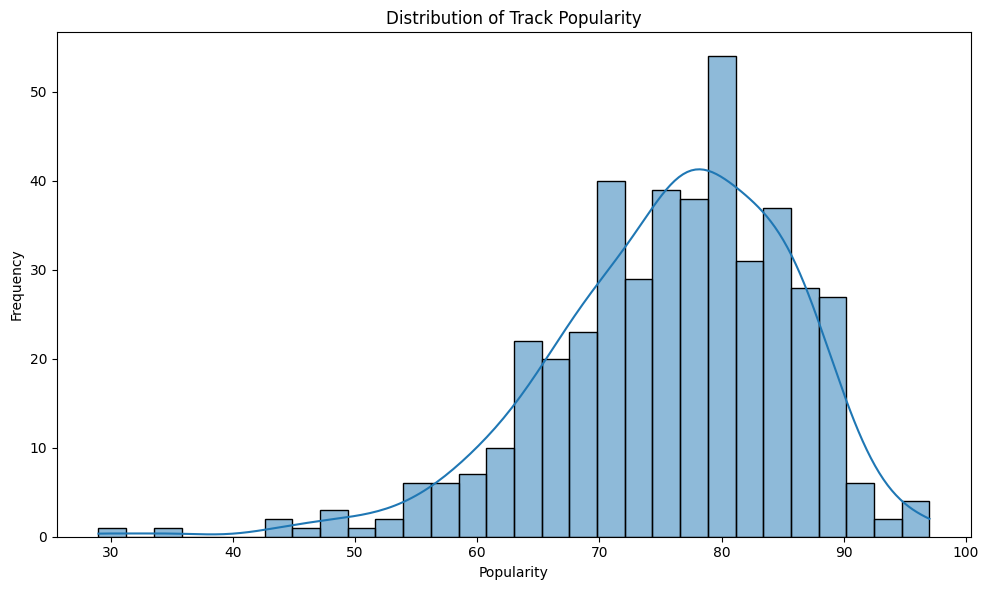

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Popularity', bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

3:Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

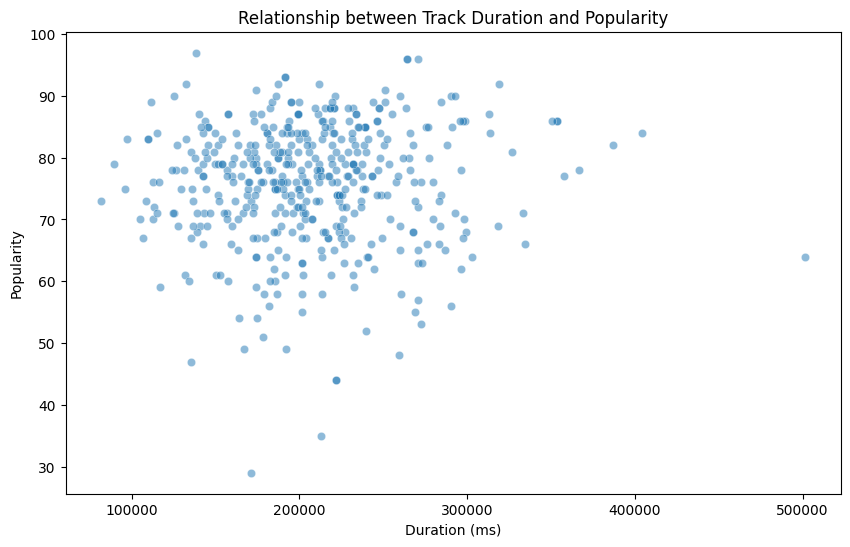

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.5)
plt.title('Relationship between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4:Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

The artist with the highest number of tracks is: Drake with 20 tracks.


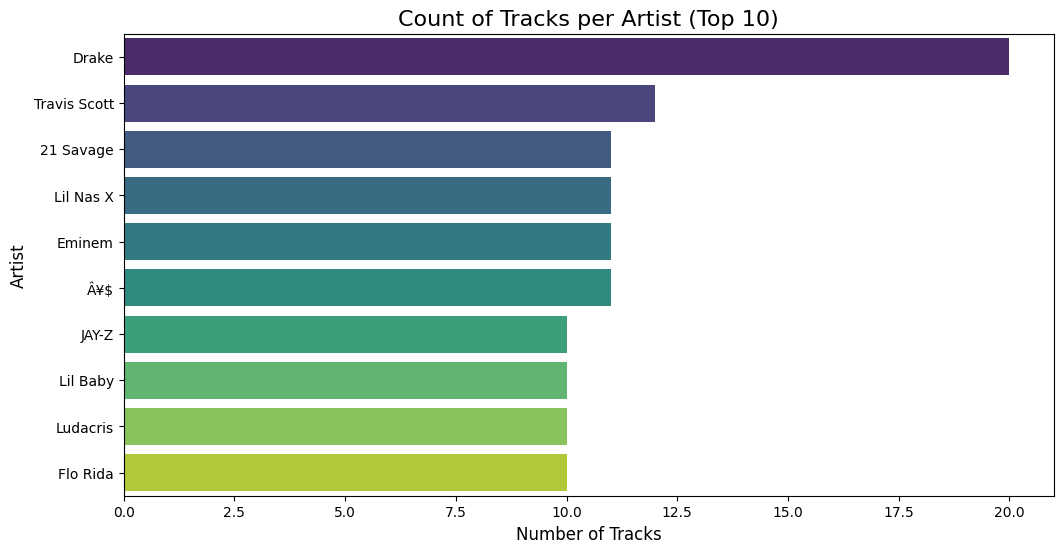

In [ ]:
artist_track_counts = df['Artist'].value_counts()


top_artist = artist_track_counts.index[0]
top_artist_count = artist_track_counts.iloc[0]

print(f"The artist with the highest number of tracks is: {top_artist} with {top_artist_count} tracks.")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=artist_track_counts.index[:10], palette='viridis')

plt.title('Count of Tracks per Artist (Top 10)', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.show()


5:What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
least_popular_tracks = df.sort_values(by='Popularity', ascending=True)
top_5_least_popular = least_popular_tracks.head(5)
print("Top 5 Least Popular Tracks:")
display(top_5_least_popular[['Artist', 'Track Name']])

Top 5 Least Popular Tracks:


,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
435,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix


6:Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

Average Popularity for the Top 5 Artists:Artist
cassÃ¶          92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
Â¥$             86.090909
Name: Popularity, dtype: float64
Artist with the highest average popularity:cassÃ¶(92.00)


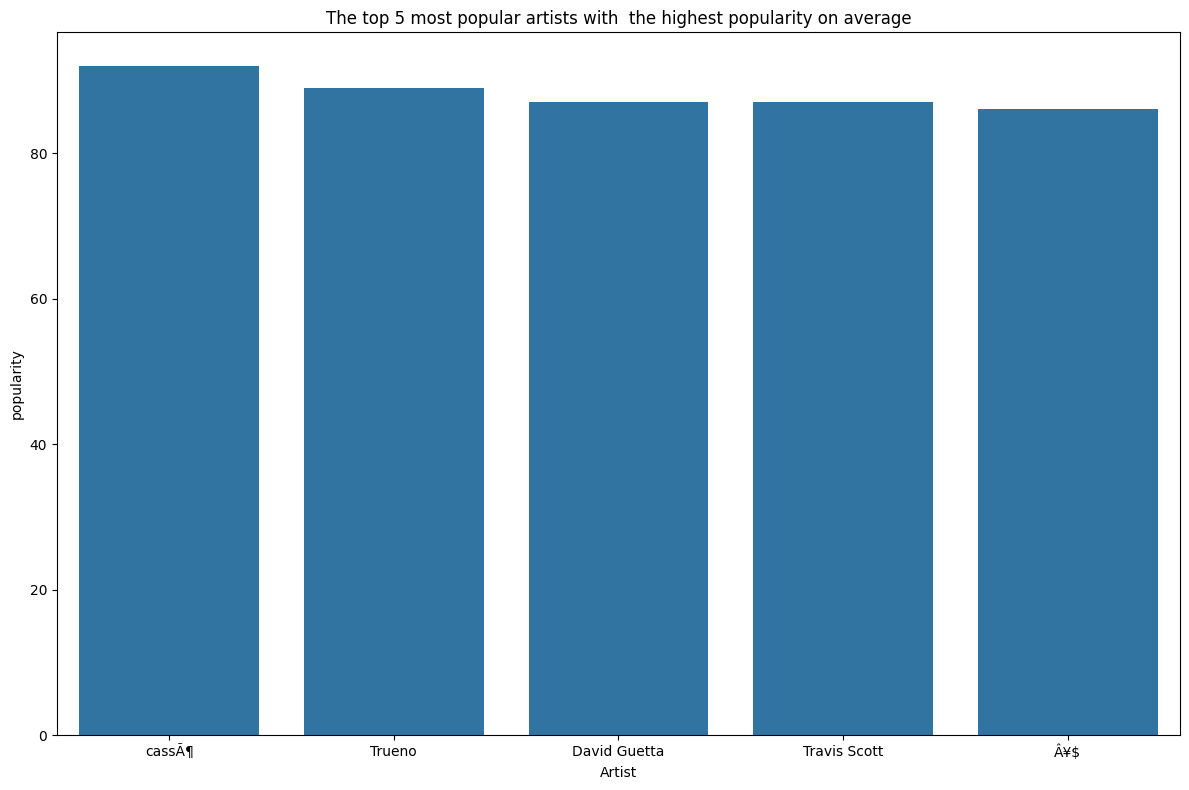

In [ ]:
Artists=df.groupby('Artist')['Popularity'].mean()
top5_artists=Artists.sort_values(ascending=False).head(5)
print(f"Average Popularity for the Top 5 Artists:{top5_artists}")
Popular_Artist=top5_artists.idxmax()
print(f"Artist with the highest average popularity:{Popular_Artist}({top5_artists[Popular_Artist]:.2f})")

#displaying the Average popularity of each artist
plot_df=top5_artists.reset_index()
plot_df.columns=['Artists','Popularity']
plt.figure(figsize=(12,8))
sns.barplot(data=plot_df,x='Artists',y='Popularity')
plt.title('The top 5 most popular artists with  the highest popularity on average')
plt.xlabel('Artist')
plt.ylabel('popularity')
plt.tight_layout()
plt.show()

7:For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [ ]:
artist=df.groupby('Artist')['Popularity'].mean()
top_artist=artist.sort_values(ascending=False).head().index.tolist()
top_df=df[df['Artist'].isin(top_artist)]
most_popular_track=top_df.loc[top_df.groupby('Artist')['Popularity'].idxmax()]
most_popular_track

,Artist,Track Name,Popularity,Duration (ms),Track ID
200,David Guetta,Baby Don't Hurt Me,87,140017,3BKD1PwArikchz2Zrlp1qi
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
241,Trueno,Mamichula - con Nicki Nicole,89,219201,0TUW9faHNaBmi89wsYGp9y
140,cassÃ¶,Prada,92,132359,59NraMJsLaMCVtwXTSia8i
260,Â¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN


8:Visualize relationships between multiple numerical variables simultaneously using a pair plot.

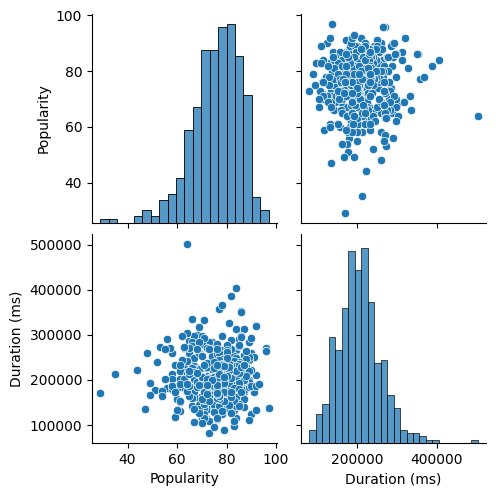

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.dtypes


,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


9:Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?

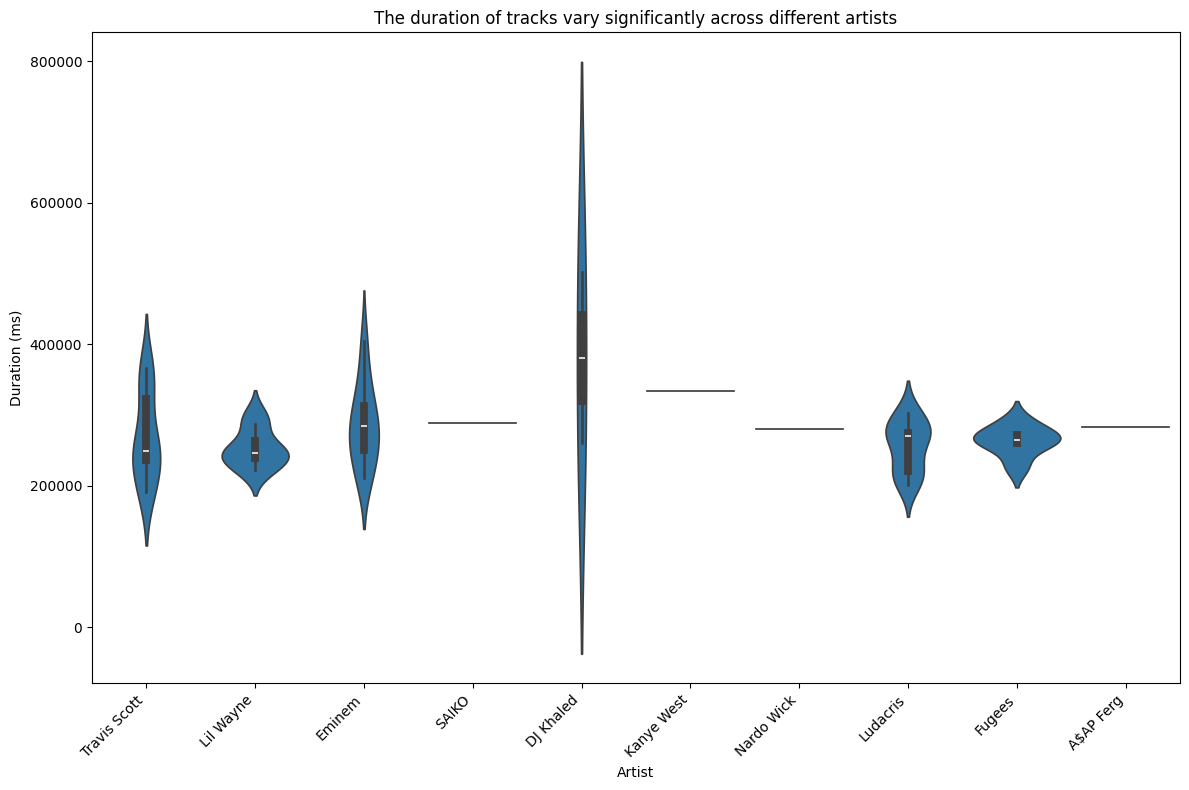

In [ ]:
tracks=df.groupby('Artist')['Duration (ms)'].mean().nlargest(10).index
df_filtered = df[df['Artist'].isin(tracks)]

plt.figure(figsize=(12,8))
sns.violinplot(data=df_filtered,x='Artist',y='Duration (ms)')
plt.title('The duration of tracks vary significantly across different artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

10:How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

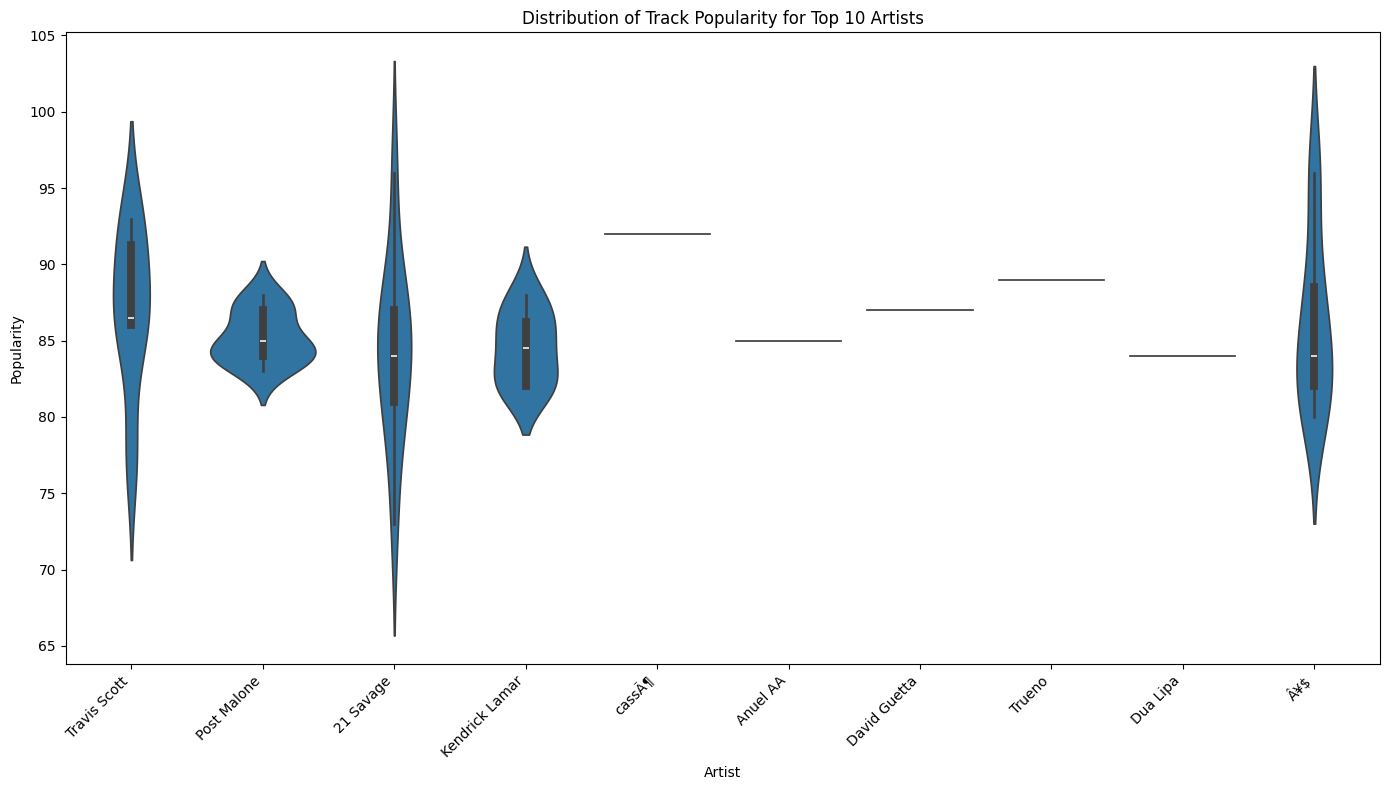

In [ ]:
# Get the top 10 artists by average popularity
top_artists = df.groupby('Artist')['Popularity'].mean().nlargest(10).index.tolist()

# Filter the DataFrame to include only tracks by the top artists
df_top_artists = df[df['Artist'].isin(top_artists)]

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_artists, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity for Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
